# Banking Churn Analysis & Modeling.
### - Mục tiêu của dự án này là giải quyết bài toán tỷ lệ khách hàng rời bỏ ngân hàng để hiểu lý do tại sao khách hàng rời bỏ.
### - Huấn luyện mô hình Machine Learning để xác định các yếu tố chính ảnh hưởng đến tỷ lệ khách hàng rời bỏ.
# Tổng quan Dự án:
1. **Nhập Thư viện & Tập Dữ liệu**
   
2. **Xử lý Dữ liệu**
   - *Dọn dẹp Dữ liệu*
   - *Xử lý Giá trị Thiếu*
   - *Xử lý Sự không nhất quán*

3. **Phân tích Dữ liệu Khám Phá (EDA)**
   - *Hình dung Biến Phụ thuộc*
   - *Hình dung Biến Độc lập*
   - *Tạo ra Những Thông tin*

4. **Tiền xử lý Dữ liệu**
   - *Lựa chọn và Đánh giá Biến*
   - *Biến đổi, Chuẩn hóa và Mã hóa Đặc trưng*
   - *Chia Dữ liệu cho Huấn luyện Mô hình*
   - *Áp dụng SMOTE để giảm thiểu sự mất cân bằng lớp*

5. **Tạo, Huấn luyện và Đánh giá Mô hình**
   - *Lựa chọn Thuật toán Phân loại*
   - *Huấn luyện và Tinh chỉnh Mô hình*
   - *Đánh giá và Hiệu suất Mô hình*
   - *Phân tích Ma trận Nhầm lẫn*
   - *Độ chính xác, Độ tinh khiết, Độ nhạy và Điểm F1*
   - *Đường cong Nhận diện Hoạt động (ROC) và AUC*
   - *Đánh giá và Đóng góp của Đặc trưng*

## Importing Libraries

In [191]:
import numpy as np  # Tính toán số học
import pandas as pd  # Xử lý dữ liệu
import seaborn as sns  # Trực quan hóa dữ liệu
import matplotlib.pyplot as plt  # Vẽ biểu đồ
import plotly.express as px
from scipy import stats  # Thống kê
import warnings  # Quản lý cảnh báo
warnings.filterwarnings("ignore")  # Ẩn cảnh báo
sns.set(style="darkgrid", font_scale=1.5)  # Thiết lập kiểu seaborn

from sklearn.tree import DecisionTreeClassifier  # Cây quyết định
from sklearn.ensemble import RandomForestClassifier  # Rừng ngẫu nhiên

from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # Mã hóa nhãn
from sklearn.model_selection import train_test_split, GridSearchCV  # Chia dữ liệu và tìm tham số
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Đánh giá mô hình
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score  # Ma trận nhầm lẫn và ROC

from imblearn.over_sampling import SMOTE  # Tạo mẫu cho lớp thiểu số


## Loading Dataset

In [192]:
df = pd.read_csv(r"/home/phuc/Data_in_VS_code/API/tutorial-env/Churn_Modelling.csv")
df_new = pd.read_csv(r"/home/phuc/Data_in_VS_code/API/tutorial-env/Churn_Modelling.csv")

In [193]:
df.head(-1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


## Fundamental knowledge of data

### 1.Kiểm tra kích thước của tập dữ liệu

In [194]:
print("Total number of records/rows present in the dataset is:",df.shape[0])
print("Total number of attributes/columns present in the dataset is:",df.shape[1])
#Kiểm tra kích thước (bao nhiêu dòng, cột).

Total number of records/rows present in the dataset is: 10000
Total number of attributes/columns present in the dataset is: 14


#### Bộ dữ liệu có 10k dòng và 14 cột

### 2.Tìm nạp tên thuộc tính (tên các cột)

In [195]:
df.columns
#gọi ra tất cả tên của cột (tiêu đề)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Phân tích chi tiết các cột dữ liệu

1. RowNumber:

    Mục đích: Là một chỉ số duy nhất cho mỗi dòng dữ liệu, không mang ý nghĩa phân tích.

2. CustomerId:

    Mục đích: Là mã định danh duy nhất của mỗi khách hàng.

3. Surname:

    Mục đích: Cung cấp thông tin về họ của khách hàng.

4. CreditScore:

    Mục đích: Đánh giá khả năng tín nhiệm của khách hàng dựa trên lịch sử tín dụng.

5. Geography:

    Mục đích: Xác định vị trí địa lý của khách hàng.

6. Gender:

    Mục đích: Xác định giới tính của khách hàng.

7. Age:

    Mục đích: Chỉ ra độ tuổi của khách hàng.

8. Tenure:

    Mục đích: Chỉ số thời gian khách hàng sử dụng dịch vụ.

9. Balance:

    Mục đích: Số dư tài khoản của khách hàng.

10. NumOfProducts:

    Mục đích: Số lượng sản phẩm mà khách hàng đang sử dụng.

11. HasCrCard:

    Mục đích: Cho biết khách hàng có sử dụng thẻ tín dụng hay không.

12. IsActiveMember:

    Mục đích: Cho biết khách hàng có phải là thành viên tích cực hay không.

13. EstimatedSalary:

    Mục đích: Ước tính mức thu nhập của khách hàng.

14. Exited:

    Mục đích: Cho biết khách hàng có rời bỏ ngân hàng hay không.

### 3.Tạo thông tin cơ bản của dữ liệu

In [196]:
df.info()
#Hiểu thông tin của các kiểu dữ liệu (số, chữ, có null không?)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### DataFrame có 10,000 bản ghi và 14 cột. Các loại dữ liệu bao gồm:
- int64 (9 cột): Chứa các thông tin số nguyên như CustomerId, CreditScore, và Exited.
- float64 (2 cột): Bao gồm Balance và EstimatedSalary, đại diện cho các giá trị số thực.
- object (3 cột): Gồm Surname, Geography, và Gender, là các biến phân loại.
- 100% giá trị không null, cho thấy không có giá trị thiếu.
  
#### Dựa vào kết quả ta không cần xử lý null, missing values và Data Imputation


### 4.Kiểm tra trùng lặp

In [197]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)

0


#### Dữ liệu không bị trùng nhau.

### 5.Thực hiện phân tích thống kê mô tả trên các cột phân loại.

In [198]:
df.describe(include="object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


#### Dựa trên kết quả thống kê mô tả:

1. **Surname**: Trong số 10,000 khách hàng, có 2,932 họ khác nhau, với "Smith" là phổ biến nhất (32 lần). Điều này cho thấy sự đa dạng trong họ của khách hàng.

2. **Geography**: Khách hàng chủ yếu đến từ 3 quốc gia, trong đó Pháp chiếm ưu thế với 5,014 khách hàng. Điều này có thể ảnh hưởng đến chiến lược tiếp thị.

3. **Gender**: Có 2 giới tính, với nam giới chiếm 5,457 khách hàng. Điều này gợi ý rằng ngân hàng cần cân nhắc các sản phẩm phù hợp cho cả hai giới.

#### Đánh giá và nhận xét:
Các thống kê này cho thấy sự đa dạng trong cơ cấu khách hàng, nhưng cũng chỉ ra rằng ngân hàng có thể cần điều chỉnh chiến lược tiếp thị và dịch vụ để phục vụ tốt hơn cho nhu cầu của từng nhóm khách hàng, đặc biệt là trong việc phát triển sản phẩm và dịch vụ phù hợp với giới tính và vị trí địa lý.

##  Xử lý Dữ liệu

- Xử lý dữ liệu, hay còn gọi là "data mining", là quá trình làm sạch, chuyển đổi và chuẩn bị dữ liệu thô để phục vụ cho việc phân tích.
- Quá trình này bao gồm việc xử lý các giá trị thiếu, khắc phục những bất nhất và định dạng dữ liệu trước khi nó có thể được sử dụng cho các phân tích tiếp theo.

### 1. Hiển thị Mẫu Ngẫu Nhiên của Dữ liệu

In [199]:
df.sample(10)
#Lấy mẫu ngẫu nhiên

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5777,5778,15642248,Ko,608,Spain,Male,66,8,123935.35,1,1,1,65758.19,0
3974,3975,15621031,Mofflin,761,Spain,Male,27,8,0.00,2,1,0,63297.70,0
2591,2592,15790846,Ts'ai,634,Germany,Male,38,2,148430.55,1,1,1,56055.72,0
2865,2866,15590228,Greenwalt,715,France,Male,21,6,76467.16,1,1,1,173511.72,0
300,301,15803976,Efremov,694,France,Female,31,10,0.00,2,1,0,160990.27,0
2257,2258,15698349,Davy,686,Spain,Female,35,4,0.00,2,1,1,159676.55,0
4364,4365,15727408,Koo,523,Germany,Male,27,8,61688.61,2,1,0,147059.16,0
3766,3767,15724890,Cross,584,Spain,Male,36,4,82696.09,2,0,0,83058.14,0
4563,4564,15694376,Sullivan,705,Germany,Female,64,3,153469.26,3,0,0,146573.66,1
7077,7078,15725776,Lazar,649,Germany,Male,24,7,101195.23,1,0,0,133091.32,0


Các cột **RowNumber** và **CustomerId** thể hiện một giá trị duy nhất cho mỗi khách hàng và dường như không liên quan đến việc dự đoán khách hàng có rời bỏ hay không.

Cột **Họ** có số lượng giá trị duy nhất cao và cũng không có mối liên hệ rõ ràng với việc dự đoán khách hàng có rời bỏ hay không.

Vì vậy, chúng ta có thể đơn giản loại bỏ các tính năng này.

#### 2. Loại bỏ Các Cột Không Quan Trọng.

In [200]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)
df_new.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [201]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


#### 3. Tạo ma trận tương quan và biểu đồ nhiệt

In [202]:
print(df.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [203]:
# Đánh nhãn cột Gender
df_new['Gender'] = df_new['Gender'].map({'Male': 0, 'Female': 1})

# Đánh nhãn cột Geography
df_new['Geography'] = df_new['Geography'].map({'France': 0, 'Spain': 1, 'Germany': 2})

print(df_new)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       1   42       2       0.00              1   
1             608          1       1   41       1   83807.86              1   
2             502          0       1   42       8  159660.80              3   
3             699          0       1   39       1       0.00              2   
4             850          1       1   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       0   39       5       0.00              2   
9996          516          0       0   35      10   57369.61              1   
9997          709          0       1   36       7       0.00              1   
9998          772          2       0   42       3   75075.31              2   
9999          792          0       1   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  E

In [204]:
print(df_new.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [205]:
print(df_new.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [206]:
print("Các cột trong df_new:", df_new.columns)

Các cột trong df_new: Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [207]:
#correlation_matrix = df.corr(numeric_only=True)

#plt.figure(figsize=(12, 10))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Matrix Heatmap')
#plt.show()

* **Mối tương quan tiêu cực mạnh nhất** nằm giữa `NumOfProducts` (Số lượng sản phẩm) và `Exited` (hoặc `Churned` - Đã rời bỏ).  Giá trị khoảng -0.3 cho thấy khách hàng sử dụng nhiều sản phẩm có xu hướng ít rời bỏ dịch vụ hơn. Đây là một điểm đáng lưu ý để tìm hiểu sâu hơn.

* **Mối tương quan tích cực mạnh nhất** là giữa `Age` (Tuổi) và `Exited/Churned`.  Giá trị khoảng 0.29 cho thấy khách hàng lớn tuổi có xu hướng rời bỏ dịch vụ nhiều hơn.

* Ngoài ra, có một **mối tương quan tiêu cực** đáng chú ý giữa `IsActiveMember` (Là thành viên tích cực) và `Exited/Churned` (khoảng -0.16), cho thấy thành viên tích cực có xu hướng ít rời bỏ hơn.

* Mối tương quan giữa `Balance` (Số dư) và `Exited/Churned` (khoảng 0.12) cũng đáng xem xét, mặc dù không mạnh bằng.  Điều này gợi ý rằng số dư tài khoản có thể có một chút ảnh hưởng đến việc khách hàng rời bỏ dịch vụ.

Các mối tương quan còn lại khá yếu (gần 0), cho thấy không có mối liên hệ tuyến tính rõ ràng giữa các biến số đó.  

**Điều quan trọng cần lưu ý:** Ma trận tương quan chỉ thể hiện mối tương quan tuyến tính.  Việc thiếu tương quan tuyến tính không loại trừ khả năng tồn tại mối quan hệ phi tuyến tính phức tạp hơn giữa các biến.  Cần phân tích kỹ hơn và sử dụng các phương pháp khác để khám phá đầy đủ các mối quan hệ trong dữ liệu.


#### 4. Đổi tên Biến Mục tiêu và các giá trị của nó bằng các giá trị phù hợp hơn để phân tích tốt hơn.

In [208]:
df.rename(columns={"Exited":"Churned"},inplace=True) # đổi từ Exited sang Churned
df["Churned"].replace({0:"No",1:"Yes"},inplace=True) # đổi 1 và 0 thành yes và no
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


## Phân tích dữ liệu

### 1. Visualizing Target Variable

In [209]:
import plotly.graph_objects as go

count = df["Churned"].value_counts()

# Tạo biểu đồ cột cho sự phân bố khách hàng đã rời bỏ
fig = go.Figure()

# Thêm biểu đồ cột
fig.add_trace(go.Bar(
    x=count.index,
    y=count.values,
    marker=dict(color='rgba(102, 194, 165, 0.7)', line=dict(color='rgba(102, 194, 165, 1)', width=2)),
    name='Customer Churned Distribution'
))

# Cập nhật layout cho biểu đồ cột
fig.update_layout(
    title='Customer Churned Distribution',
    xaxis_title='Churned',
    yaxis_title='Count',
    font=dict(size=15, color='black'),
    showlegend=False
)

# Tạo biểu đồ tròn cho sự phân bố khách hàng đã rời bỏ
fig_pie = go.Figure(data=[go.Pie(
    labels=count.index,
    values=count.values,
    textinfo='percent+label',
    marker=dict(colors=px.colors.qualitative.Set2),  # Sửa ở đây
    hole=0.3,
    pull=[0, 0.1]  # Thay đổi kích thước cho phần "No"
)])

# Cập nhật layout cho biểu đồ tròn
fig_pie.update_layout(
    title='Customer Churned Distribution',
    font=dict(size=15, color='black')
)

# Hiển thị cả hai biểu đồ
fig.show()
fig_pie.show()

# In số lượng khách hàng đã rời bỏ và chưa rời bỏ
count_of_churned_yes = count.get("Yes", 0)  # Tránh lỗi KeyError nếu không có "Yes"
count_of_churned_no = count.get("No", 0)    # Tránh lỗi KeyError nếu không có "No"

print(f"Number of churned customers: {count_of_churned_yes}")
print(f"Number of not churned customers: {count_of_churned_no}")  # Hoàn thiện dòng này


Number of churned customers: 2037
Number of not churned customers: 7963


Có sự mất cân bằng lớn giữa các lớp trong dữ liệu, với 2,037 khách hàng đã rời bỏ và 7,963 khách hàng không rời bỏ. Điều này có thể dẫn đến thiên lệch trong hiệu suất của mô hình. Để khắc phục tình trạng mất cân bằng này, chúng ta cần áp dụng kỹ thuật tăng cường mẫu (over-sampling).

:
### 2. Visualizing Customer Churned by Gender.

In [210]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)

    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()

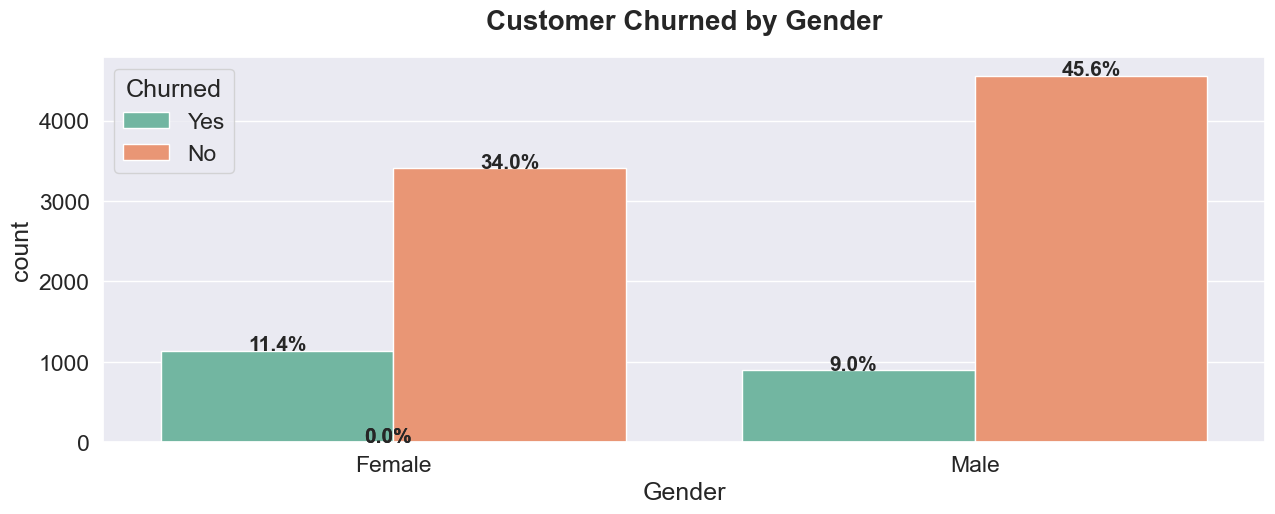

In [211]:
countplot("Gender")

- Xác suất rời bỏ đối với Khách hàng nữ cao hơn so với khách hàng nam. Điều đó có nghĩa là khách hàng nữ đang ngừng kích hoạt các tiện ích ngân hàng của họ nhiều hơn so với khách hàng nam.

### 3. Visualizing Customer Churned by Geoprahical Region.

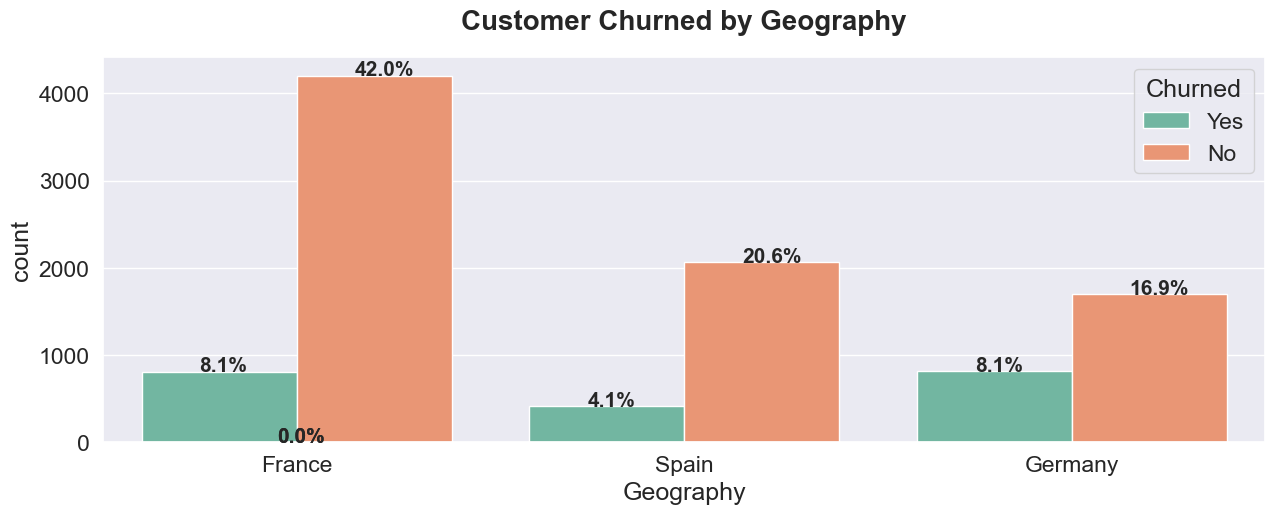

In [212]:
countplot("Geography")



Một nửa số khách hàng đến từ Pháp, tiếp theo là Đức và Tây Ban Nha. Mặc dù tổng số khách hàng giữa Pháp và Đức có sự chênh lệch lớn, nhưng tỷ lệ rời bỏ của khách hàng ở cả hai quốc gia lại tương đương. Trong khi đó, số lượng khách hàng từ Tây Ban Nha và Đức gần như bằng nhau, nhưng tỷ lệ rời bỏ ở Đức lại gần gấp đôi so với Tây Ban Nha.

### 4. Visualizing Customer Churn by "HasCrCard".

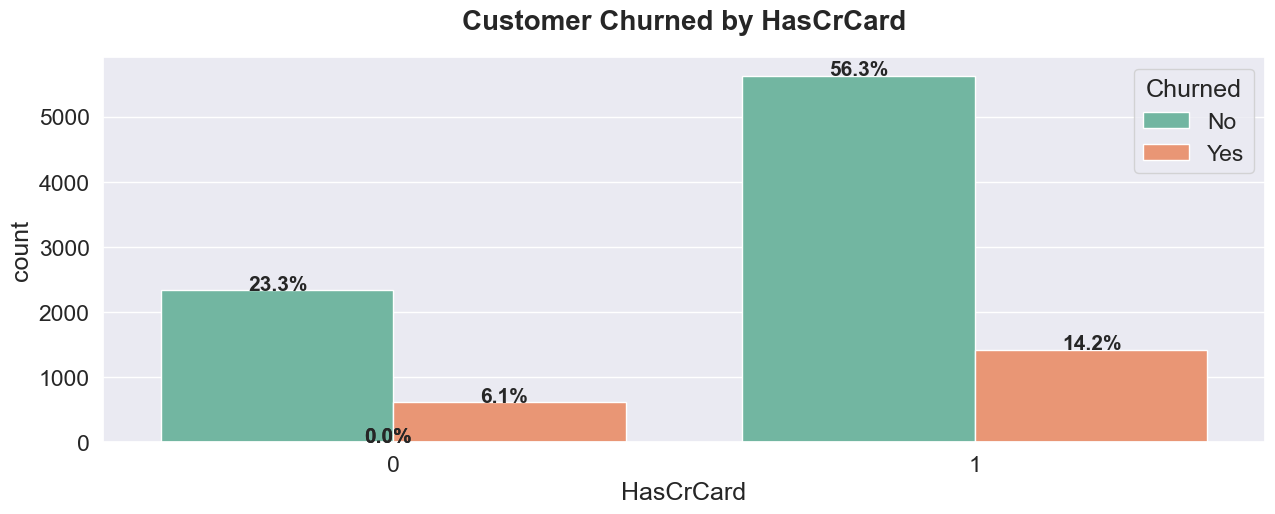

In [213]:
countplot("HasCrCard")

Hơn 70% khách hàng sở hữu thẻ tín dụng. Tỷ lệ xác suất rời bỏ giữa hai nhóm khách hàng có và không có thẻ tín dụng gần như là 1:4. Do đó, có thể kết luận rằng thẻ tín dụng không ảnh hưởng đến tỷ lệ khách hàng rời bỏ.


### 5. Visualizing Customer Churned by "NumOfProducts".

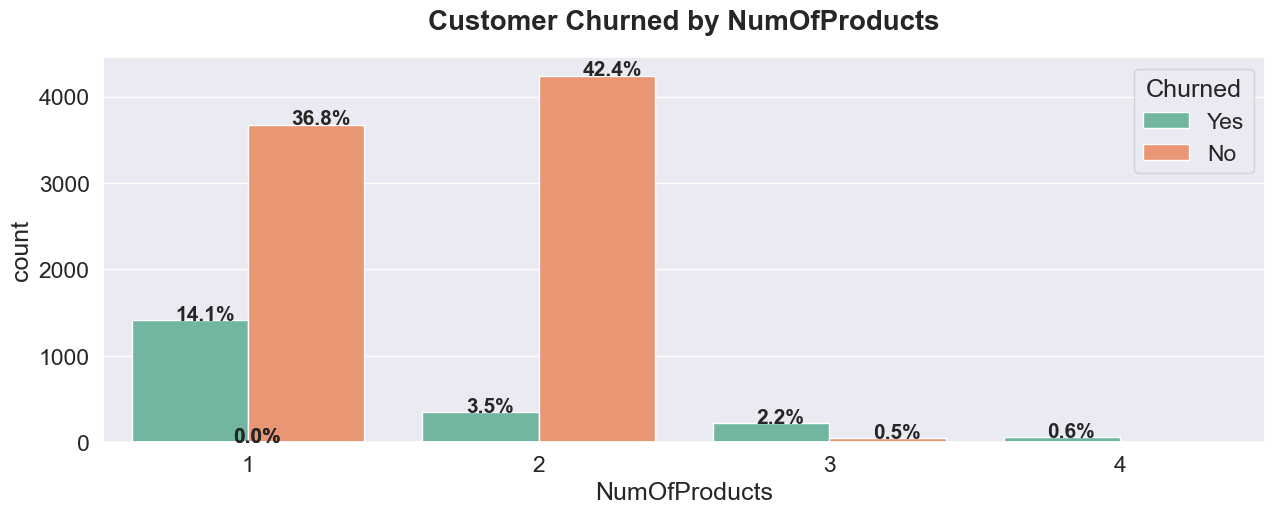

In [214]:
countplot("NumOfProducts")

Hầu hết khách hàng đều có tổng cộng 1 hoặc 2 sản phẩm ngân hàng.

Rất ít khách hàng sở hữu trên 2 sản phẩm ngân hàng.

Tỷ lệ rời bỏ thấp nhất là với khách hàng chỉ có 2 sản phẩm.

Ngược lại, tỷ lệ rời bỏ rất cao ở những khách hàng có 1 sản phẩm hoặc nhiều hơn 2 sản phẩm.

### 6. Visualizing Customer Churned by "IsActiveMember".

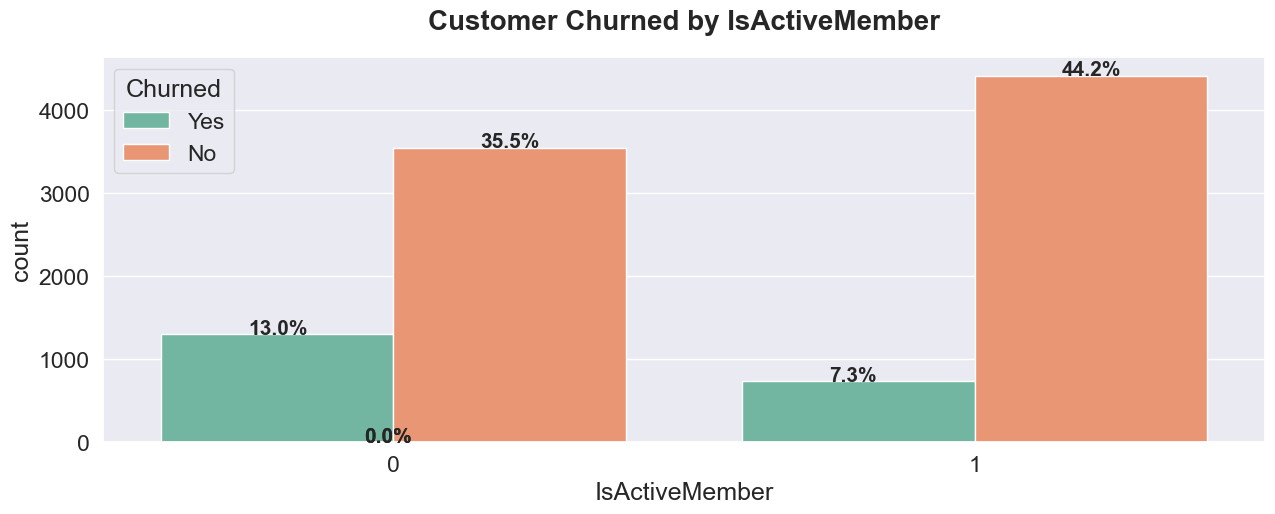

In [215]:
countplot("IsActiveMember")

Có khoảng số lượng khách hàng tương đương giữa những người hoạt động và không hoạt động.

Tuy nhiên, tỷ lệ rời bỏ của khách hàng không hoạt động gần như gấp đôi so với khách hàng hoạt động.

Do đó, những khách hàng không hoạt động có khả năng cao hơn trong việc hủy bỏ các dịch vụ ngân hàng của họ.

### 7. Visualizing Customer Churned by "Tenure".

In [216]:
# Tạo biểu đồ cột cho số lượng khách hàng theo thời gian gắn bó
fig = px.histogram(df, x="Tenure", color="Churned", barmode='group',
                   color_discrete_sequence=px.colors.qualitative.Set2)

# Cập nhật layout cho biểu đồ
fig.update_layout(
    title="Customer Churned by Tenure",
    xaxis_title="Tenure",
    yaxis_title="Count",
    font=dict(size=15, color='black'),
)

# Thêm phần trăm vào mỗi cột
total_count = len(df)  # Tính tổng số khách hàng một lần trước
for i in range(len(fig.data)):
    if fig.data[i].y is not None:  # Kiểm tra xem y có giá trị không
        for j in range(len(fig.data[i].y)):
            percentage = f"{(fig.data[i].y[j] / total_count) * 100:.1f}%"
            fig.add_annotation(
                x=fig.data[i].x[j],
                y=fig.data[i].y[j],
                text=percentage,
                showarrow=True,
                arrowhead=2,
                ax=0,
                ay=-30,
                font=dict(fontweight="black", size=12)
            )

# Hiển thị biểu đồ
fig.show()


Thời gian sử dụng dịch vụ cao nhất là 10 năm, điều này có nghĩa là những khách hàng này đã mở tài khoản cách đây 10 năm.

Vì có sự phân bố tương tự về tình trạng rời bỏ, chúng ta không thể rút ra bất kỳ kết luận cụ thể nào.


### 8. Visualizing Customer Churned by "CreditScore"

In [217]:
df["Churned"] = df["Churned"].astype("category")

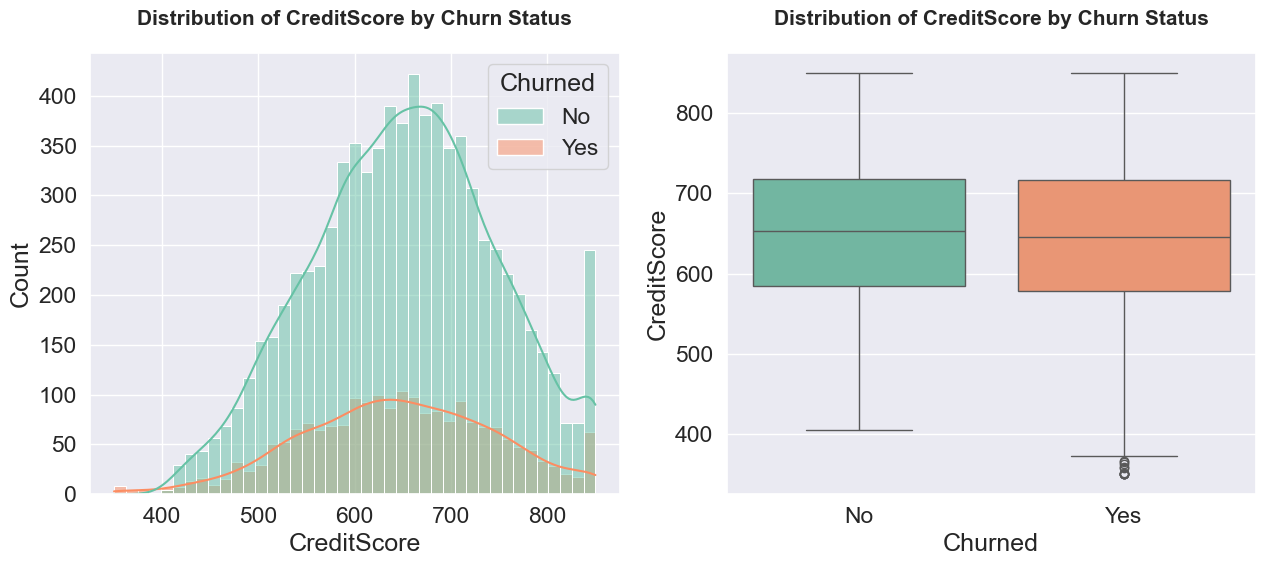

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

def continous_plot(column):
    plt.figure(figsize=(13,6))

    plt.subplot(1,2,1)
    sns.histplot(x=column, hue="Churned", data=df, kde=True, palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)

    plt.subplot(1,2,2)
    sns.boxplot(x="Churned", y=column, data=df, palette="Set2") # Corrected line
    plt.title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)

    plt.tight_layout()
    plt.show()

continous_plot("CreditScore")

Nhìn vào biểu đồ, ta có thể rút ra một số nhận xét sau về mối quan hệ giữa điểm tín dụng (Credit Score) và tỉ lệ rời bỏ dịch vụ (Churn Status):

* **Phân bố điểm tín dụng**: Nhìn chung, điểm tín dụng của khách hàng có xu hướng tập trung ở khoảng 600-750. Phân bố điểm tín dụng có dạng lệch phải, nghĩa là có nhiều người có điểm tín dụng thấp hơn là cao hơn.
* **Mối liên hệ với tỉ lệ rời bỏ**:
    * Nhìn vào biểu đồ hộp (box plot), có vẻ như khách hàng rời bỏ dịch vụ (Churned - Yes) có điểm tín dụng trung bình **thấp hơn** so với khách hàng không rời bỏ (Churned - No). Điều này cho thấy có thể có mối liên hệ yếu giữa điểm tín dụng thấp và việc rời bỏ dịch vụ.
    * Tuy nhiên, sự khác biệt về điểm tín dụng giữa hai nhóm **không quá lớn**.  Phần lớn khoảng giá trị của hai nhóm vẫn chồng lấn lên nhau. Điều này cho thấy điểm tín dụng không phải là yếu tố duy nhất ảnh hưởng đến việc khách hàng quyết định rời bỏ hay không. Cần xem xét thêm các yếu tố khác để có cái nhìn tổng quan hơn.

**Kết luận:** Mặc dù có vẻ như có mối liên hệ giữa điểm tín dụng thấp và việc rời bỏ dịch vụ, nhưng mối liên hệ này không mạnh. Cần phải phân tích thêm các yếu tố khác để đưa ra kết luận chính xác hơn về nguyên nhân dẫn đến việc khách hàng rời bỏ.


### 9. Visualizing Customer Churned by "Age".

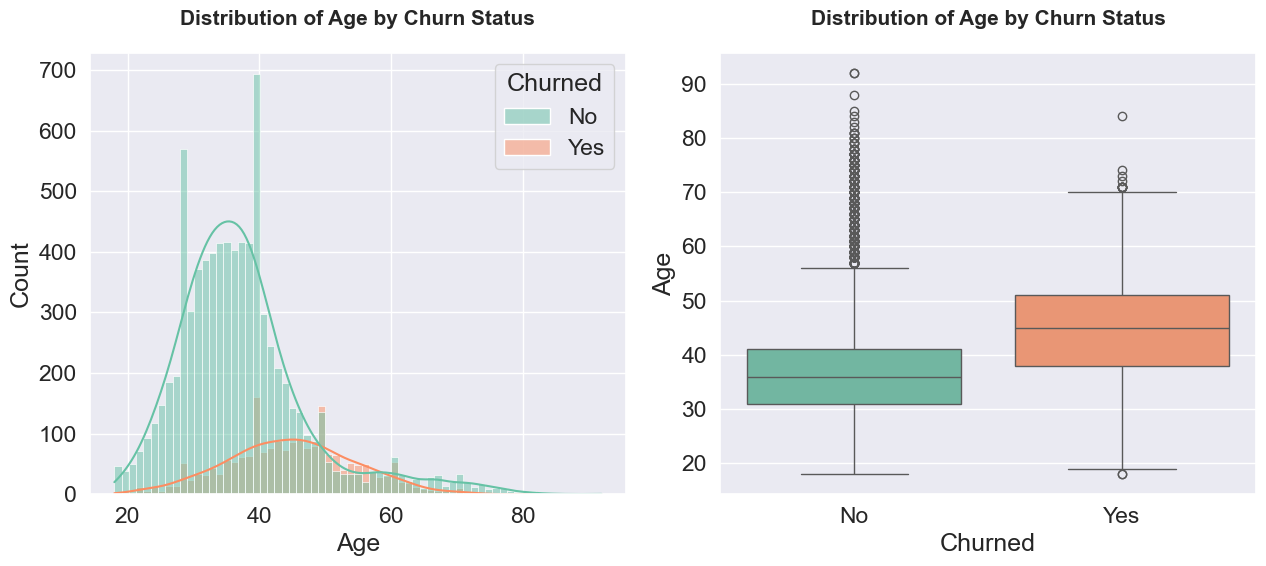

In [219]:
continous_plot("Age")

Dựa vào biểu đồ phân bố tuổi và tỉ lệ rời bỏ dịch vụ, ta có thể rút ra những nhận xét sau:

* **Phân bố tuổi**: Phần lớn khách hàng tập trung ở độ tuổi từ 30 đến 40. Phân bố tuổi có xu hướng lệch phải, nghĩa là số lượng khách hàng trẻ tuổi nhiều hơn so với khách hàng lớn tuổi.
* **Mối liên hệ với tỉ lệ rời bỏ**:
    * Nhìn chung, biểu đồ cho thấy có **sự khác biệt về độ tuổi** giữa nhóm khách hàng rời bỏ dịch vụ (Churned - Yes) và nhóm khách hàng không rời bỏ (Churned - No).
    * Nhóm khách hàng **rời bỏ dịch vụ** có xu hướng tập trung ở độ tuổi **cao hơn** so với nhóm không rời bỏ. Điều này thể hiện rõ qua biểu đồ hộp (box plot) - phần hộp của nhóm "Yes" nằm cao hơn so với nhóm "No".
    * Tuy nhiên, cần lưu ý rằng vẫn có một số lượng đáng kể khách hàng lớn tuổi **không rời bỏ** dịch vụ.
* **Phân phối có độ lệch sang phải do sự hiện diện của các giá trị ngoại lai, điều này có thể dẫn đến việc mô hình bị khớp quá mức.**

**Kết luận**:
- Để khắc phục phân phối lệch phải này, chúng ta có thể sử dụng kỹ thuật biến đổi log normal để đưa về phân phối chuẩn.

- Có thể thấy rằng tuổi tác có **ảnh hưởng nhất định** đến tỉ lệ rời bỏ dịch vụ. Khách hàng lớn tuổi có xu hướng rời bỏ dịch vụ nhiều hơn. Tuy nhiên, tuổi tác không phải là yếu tố quyết định duy nhất. Việc phân tích thêm các yếu tố khác là cần thiết để có cái nhìn đầy đủ hơn về hành vi của khách hàng.


### 10. Visualizing Customer Churned by "Balance."

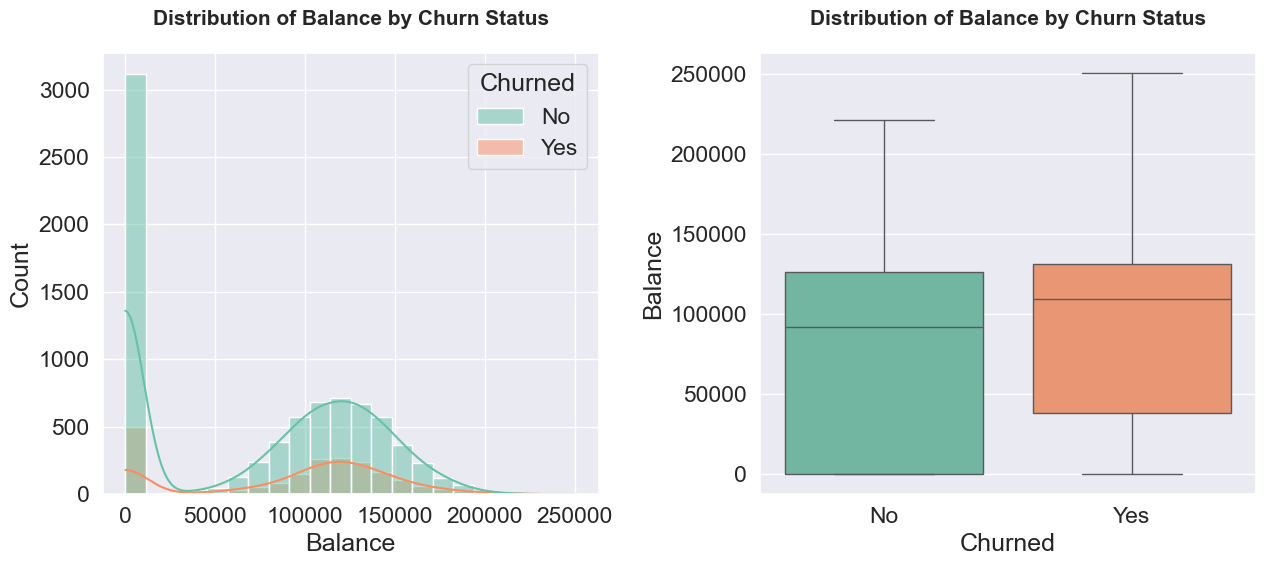

In [220]:
continous_plot("Balance")

- Dựa vào biểu đồ, ta thấy phân bố số dư tài khoản (Balance) có **độ lệch phải** rất lớn (phần lớn dữ liệu tập trung ở giá trị thấp gần 0). Điều này khiến việc phân tích box plot trở nên kém hiệu quả do phần lớn dữ liệu bị nén lại.

- Tuy nhiên, ta vẫn có thể thấy **trung vị** số dư của hai nhóm Churned (Yes/No) **gần như tương đương** nhau.

- Hơn 3000 khách hàng có số dư tài khoản bằng không. Khách hàng có số dư bằng không có khả năng cao hơn để hủy kích hoạt tài khoản của họ. Khi loại trừ giá trị bằng không, chúng ta có thể quan sát được một phân phối chuẩn. Vì vậy, không cần phải sử dụng bất kỳ kỹ thuật nào khác.

**Kết luận:** Số dư tài khoản dường như **không phải là yếu tố phân biệt** rõ ràng giữa nhóm khách hàng rời bỏ dịch vụ và nhóm không rời bỏ.


### 11. Visualizing Customer Churned by "Estimated Salary".

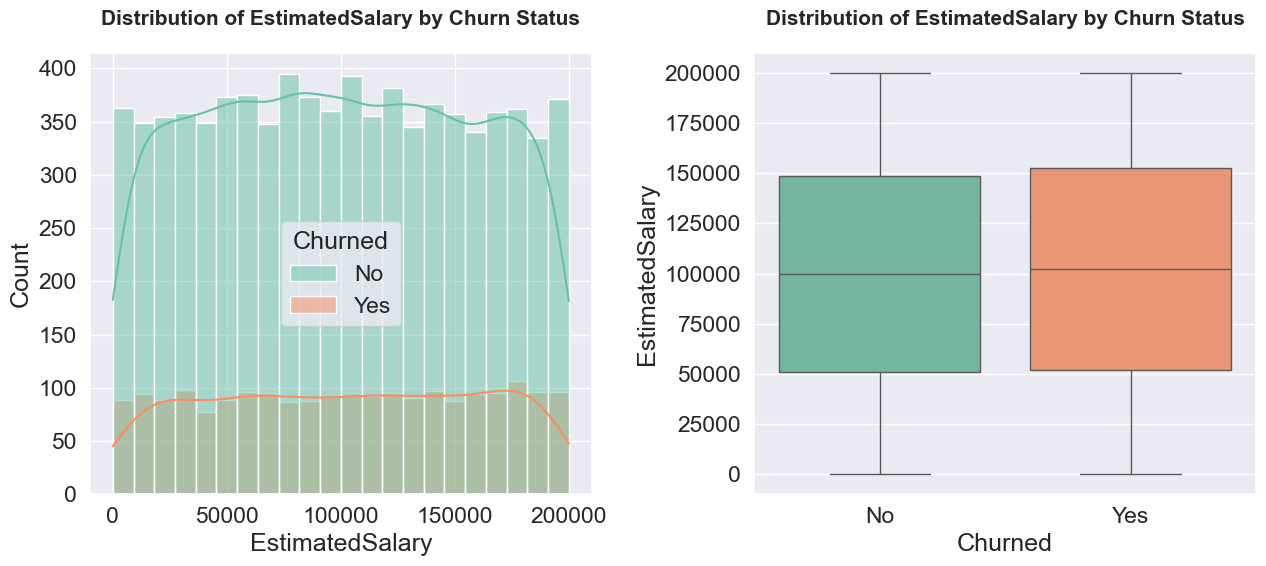

In [221]:
continous_plot("EstimatedSalary")

Nhìn vào biểu đồ, ta thấy phân bố lương ước tính (Estimated Salary) của hai nhóm Churned (Yes/No) gần như **trùng lặp hoàn toàn**.

**Kết luận:** Lương ước tính **không phải là yếu tố ảnh hưởng** đến tỉ lệ rời bỏ dịch vụ.


## Feature Engineering


### 1. Creating New Feature From "NumOfProducts" Feature.

In [222]:
conditions = [(df["NumOfProducts"]==1), (df["NumOfProducts"]==2), (df["NumOfProducts"]>2)]
values =     ["One product","More Than 2 Products","Two Products"]
df["Total_Products"] = np.select(conditions, values, default='Unknown') # Thêm giá trị mặc định 'Unknown'
#Từ cột "Num" để gộp thành 3 giá trị

In [223]:
df.drop(columns="NumOfProducts", inplace=True)

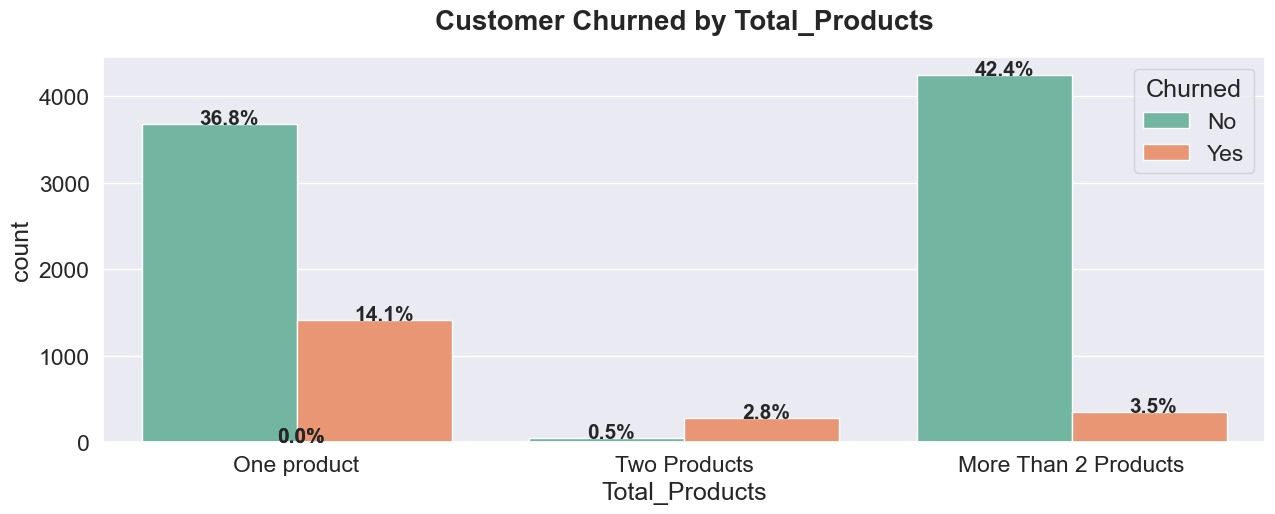

In [224]:
countplot("Total_Products")

In [225]:
print(df_new.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [226]:
cndsgds

NameError: name 'cndsgds' is not defined

In [227]:
if df_new["Geography"].dtype != 'object':
    df_new["Geography"] = df_new["Geography"].map({0: 'France', 1: 'Spain', 2: 'Germany'})

if df_new["Gender"].dtype != 'object':
    df_new["Gender"] = df_new["Gender"].map({1: 'Female', 0: 'Male'})

# Bước 1: Tạo cột "Account_Balance" dựa trên điều kiện cột 'Balance'
df_new["Account_Balance"] = np.where(df_new['Balance'] == 0, 'Zero Balance', 'More Than zero Balance')

# Bước 2: Cập nhật danh sách các cột danh mục cần mã hóa
cat_cols = ["Geography", "Gender", "NumOfProducts", "Account_Balance"]

# Kiểm tra các giá trị duy nhất trong các cột danh mục
for column in cat_cols:
    if column in df_new.columns:
        print(f"Unique Values in {column} column is:", df_new[column].unique())
        print("-" * 100, "\n")
    else:
        print(f"Cột {column} không tồn tại trong df_new.")
        print("-" * 100, "\n")

# Bước 3: Mã hóa one-hot encoding cho các cột danh mục
df_new = pd.get_dummies(data=df_new, columns=cat_cols, drop_first=False)

# Bước 4: Chuyển đổi giá trị cột "Exited" từ chữ sang số (giả sử "Exited" là "Churned")
df_new["Exited"].replace({"No": 0, "Yes": 1}, inplace=True)

# Bước 5: Kiểm tra độ lệch (skewness) của các cột "CreditScore", "Age", "EstimatedSalary"
cols = ["CreditScore", "Age", "EstimatedSalary"]
print(df_new[cols].skew().to_frame().rename(columns={0: "Feature Skewness"}))

# Bước 6: Biến đổi cột "Age" bằng hàm log để giảm độ lệch (skewness)
df_new["Age"] = np.log(df_new["Age"] + 1)  # thêm 1 để tránh log(0)

Unique Values in Geography column is: ['France' 'Spain' 'Germany']
---------------------------------------------------------------------------------------------------- 

Unique Values in Gender column is: ['Female' 'Male']
---------------------------------------------------------------------------------------------------- 

Unique Values in NumOfProducts column is: [1 3 2 4]
---------------------------------------------------------------------------------------------------- 

Unique Values in Account_Balance column is: ['Zero Balance' 'More Than zero Balance']
---------------------------------------------------------------------------------------------------- 

                 Feature Skewness
CreditScore             -0.071607
Age                      1.011320
EstimatedSalary          0.002085


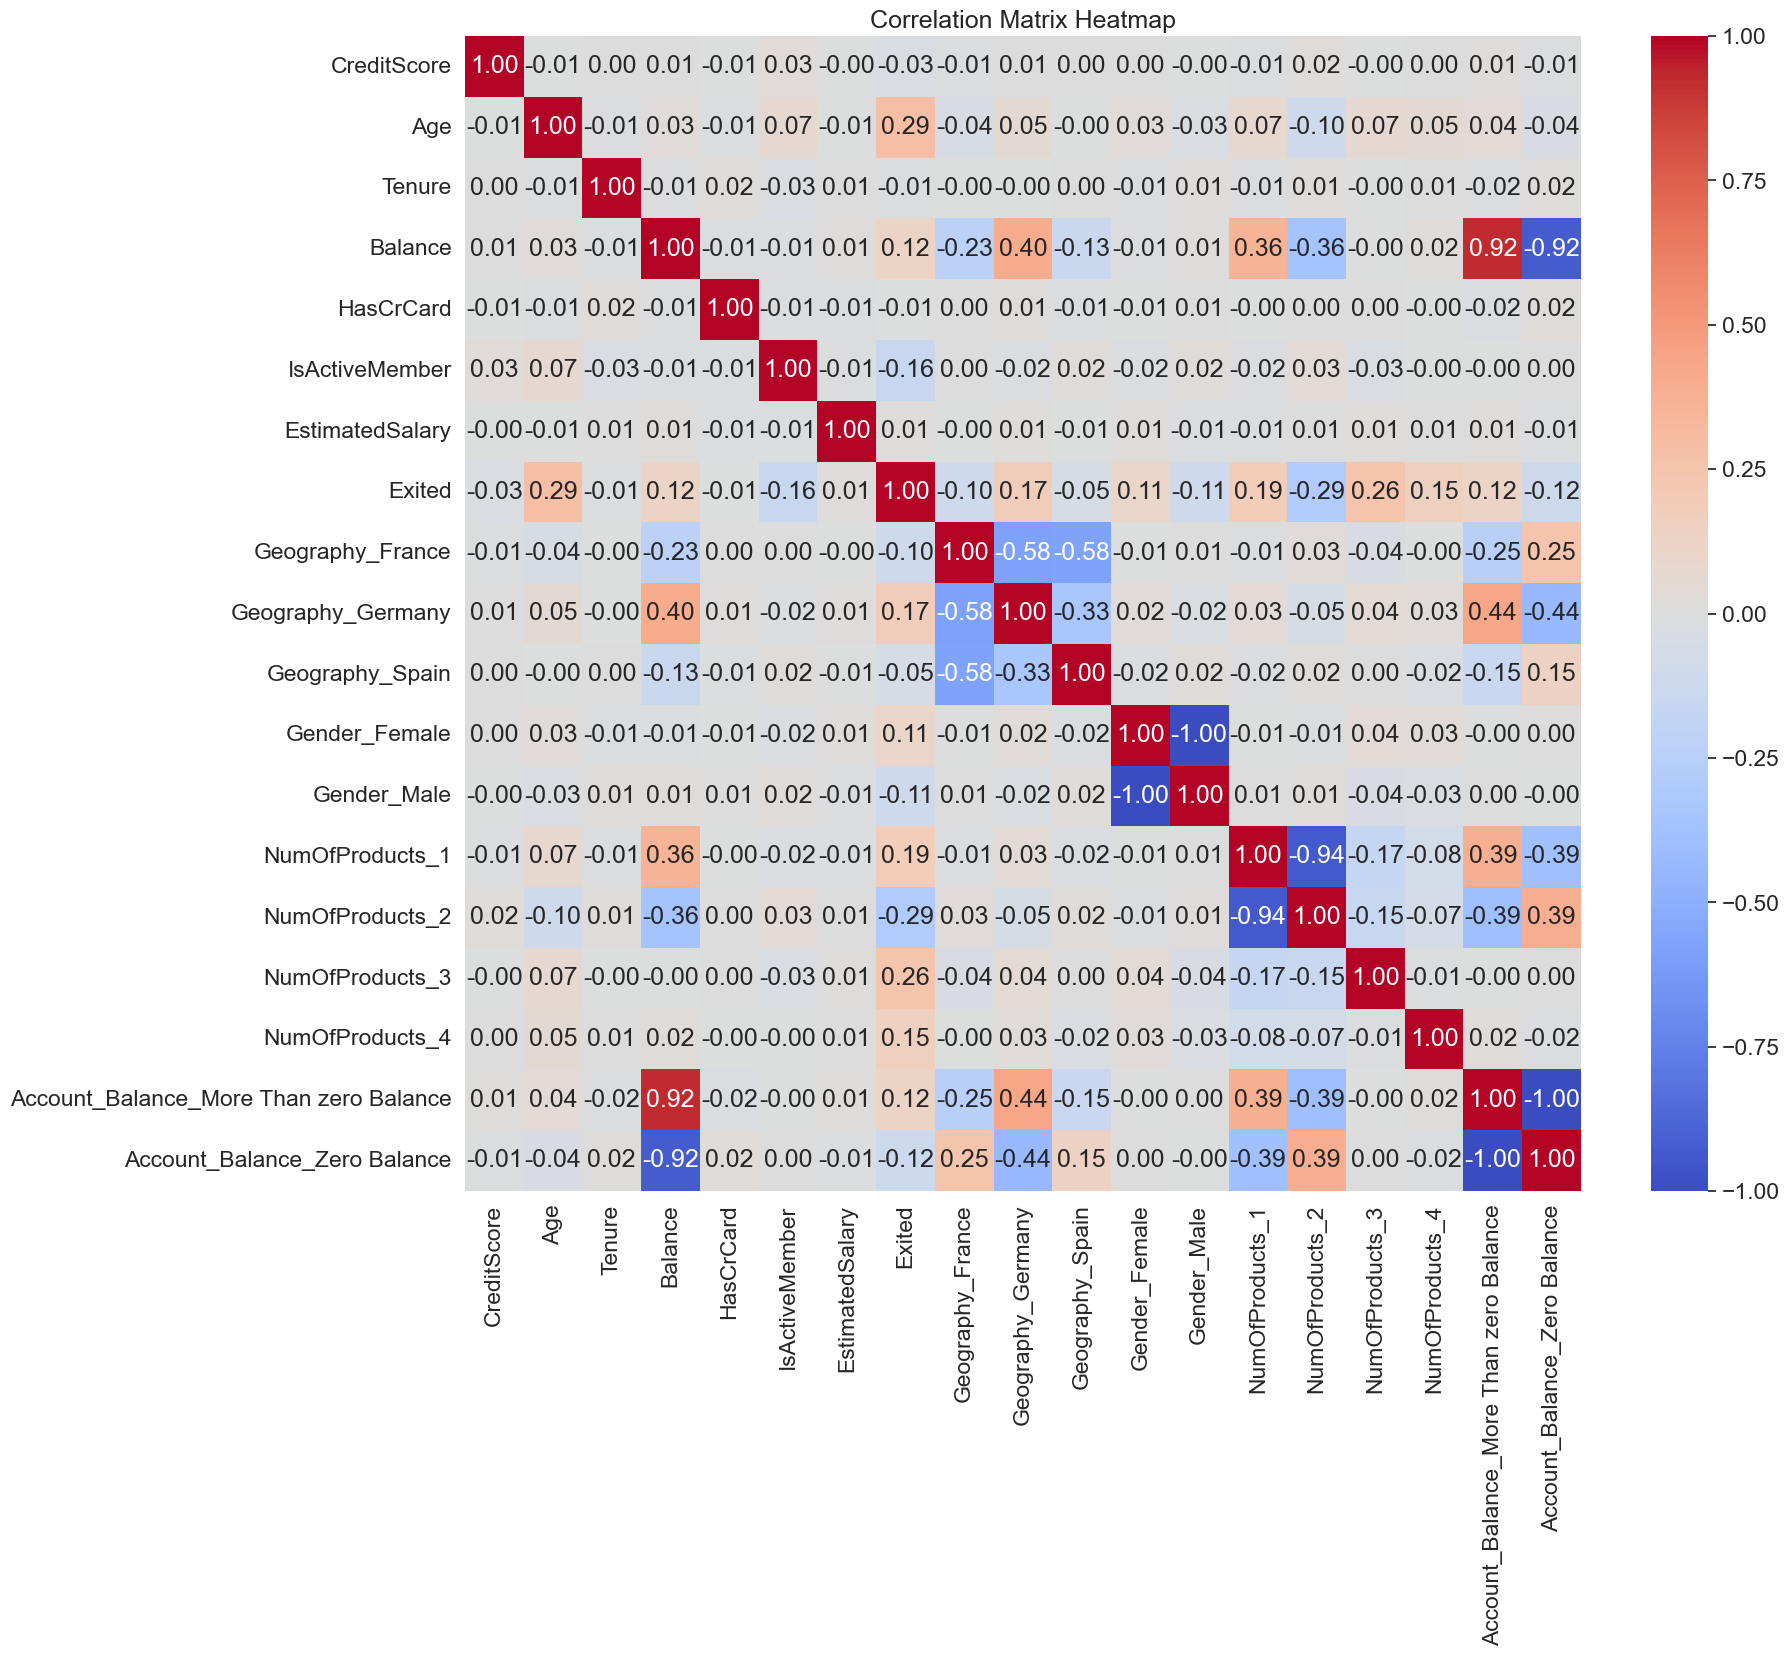

In [228]:
# Vẽ biểu đồ nhiệt với màu 'coolwarm' để dễ nhìn hơn
plt.figure(figsize=(18, 15))
sns.heatmap(df_new.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [231]:
from scipy import stats

results = {}
attributes = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
    'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
    'NumOfProducts_1', 'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4',
    'Account_Balance_More Than zero Balance', 'Account_Balance_Zero Balance'
]

# Thực hiện kiểm định t-test cho từng thuộc tính
for attribute in attributes:
    # Chọn giá trị cho churned và không churned
    churn_values = df_new[df_new['Exited'] == 1][attribute].astype(float)  # Chuyển đổi kiểu dữ liệu
    non_churn_values = df_new[df_new['Exited'] == 0][attribute].astype(float)  # Chuyển đổi kiểu dữ liệu

    # Thực hiện kiểm định t-test
    t_stat, p_value = stats.ttest_ind(churn_values, non_churn_values, nan_policy='omit')
    results[attribute] = (t_stat, p_value)

# In kết quả t-test cho từng thuộc tính
for attribute, (t_stat, p_value) in results.items():
    print(f'Test cho {attribute}: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}')


Test cho CreditScore: t-statistic = -2.710, p-value = 0.007
Test cho Age: t-statistic = 30.782, p-value = 0.000
Test cho Tenure: t-statistic = -1.400, p-value = 0.162
Test cho Balance: t-statistic = 11.936, p-value = 0.000
Test cho HasCrCard: t-statistic = -0.714, p-value = 0.475
Test cho IsActiveMember: t-statistic = -15.805, p-value = 0.000
Test cho EstimatedSalary: t-statistic = 1.210, p-value = 0.226
Test cho Geography_France: t-statistic = -10.553, p-value = 0.000
Test cho Geography_Germany: t-statistic = 17.614, p-value = 0.000
Test cho Geography_Spain: t-statistic = -5.273, p-value = 0.000
Test cho Gender_Female: t-statistic = 10.711, p-value = 0.000
Test cho Gender_Male: t-statistic = -10.711, p-value = 0.000
Test cho NumOfProducts_1: t-statistic = 18.870, p-value = 0.000
Test cho NumOfProducts_2: t-statistic = -30.582, p-value = 0.000
Test cho NumOfProducts_3: t-statistic = 26.465, p-value = 0.000
Test cho NumOfProducts_4: t-statistic = 15.544, p-value = 0.000
Test cho Account

## Tiền xử lý dữ liệu

### 1. Tính toán các giá trị duy nhất của các cột phân loại.

In [ ]:
# Giả sử bạn muốn gán "Zero Balance" nếu cột 'Balance' trong df có giá trị bằng 0,
# ngược lại gán "More Than zero Balance".

df["Account_Balance"] = np.where(df['Balance'] == 0, 'Zero Balance', 'More Than zero Balance')

In [ ]:
cat_cols = ["Geography","Gender","Total_Products","Account_Balance"]

for column in cat_cols:
    print(f"Unique Values in {column} column is:",df[column].unique())
    print("-"*100,"\n")
    #gom nhóm và chuyển dữ liệu từ chữ thành số

Unique Values in Geography column is: ['France' 'Spain' 'Germany']
---------------------------------------------------------------------------------------------------- 

Unique Values in Gender column is: ['Female' 'Male']
---------------------------------------------------------------------------------------------------- 

Unique Values in Total_Products column is: ['One product' 'Two Products' 'More Than 2 Products']
---------------------------------------------------------------------------------------------------- 

Unique Values in Account_Balance column is: ['Zero Balance' 'More Than zero Balance']
---------------------------------------------------------------------------------------------------- 



### 2. Thực hiện One Hot Encoding trên các đặc trưng phân loại.

In [ ]:
df = pd.get_dummies(columns=cat_cols, data=df)
#ở trên gom nhóm, bước này chuyển thành số

### 3. Mã hóa biến mục tiêu.

In [ ]:
df["Churned"].replace({"No":0,"Yes":1},inplace=True)

In [ ]:
df.head(10)

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
0,619,42,2,0.00,1,1,101348.88,1,True,False,False,True,False,False,True,False,False,True
1,608,41,1,83807.86,0,1,112542.58,0,False,False,True,True,False,False,True,False,True,False
2,502,42,8,159660.80,1,0,113931.57,1,True,False,False,True,False,False,False,True,True,False
3,699,39,1,0.00,0,0,93826.63,0,True,False,False,True,False,True,False,False,False,True
4,850,43,2,125510.82,1,1,79084.10,0,False,False,True,True,False,False,True,False,True,False
5,645,44,8,113755.78,1,0,149756.71,1,False,False,True,False,True,True,False,False,True,False
6,822,50,7,0.00,1,1,10062.80,0,True,False,False,False,True,True,False,False,False,True
7,376,29,4,115046.74,1,0,119346.88,1,False,True,False,True,False,False,False,True,True,False
8,501,44,4,142051.07,0,1,74940.50,0,True,False,False,False,True,True,False,False,True,False
9,684,27,2,134603.88,1,1,71725.73,0,True,False,False,False,True,False,True,False,True,False


### 4. Kiểm tra độ lệch của các đặc trưng liên tục.

In [ ]:
cols = ["Age"]

In [ ]:
df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})
#tính toán độ lệch của dữ liệu

,Feature Skewness
Age,0.18202


Bảng kết quả cho thấy hệ số skewness (độ lệch) của các đặc trưng (features)"Age":

* **Age:** Hệ số skewness là **1.011320**, đây là giá trị dương và lớn hơn 1, cho thấy phân bố của Age **lệch phải**. Điều này có nghĩa là:
    - Phần lớn dữ liệu tập trung về phía giá trị thấp hơn (người trẻ tuổi).
    - Có một số ít giá trị rất cao (người lớn tuổi) kéo đuôi phân bố về phía bên phải.


**Tóm lại:**
Phân bố của `Age` lệch phải, cho thấy có nhiều người trẻ tuổi hơn trong tập dữ liệu.


### 4. Thực hiện biến đổi log trên cột tuổi.

In [ ]:
## Lưu trữ các giá trị tuổi trước đó để so sánh với các giá trị đã được biến đổi
old_age = df["Age"]

In [ ]:
df["Age"] = np.log(df["Age"])

### 5. Hình dung tuổi trước và sau khi biến đổi.

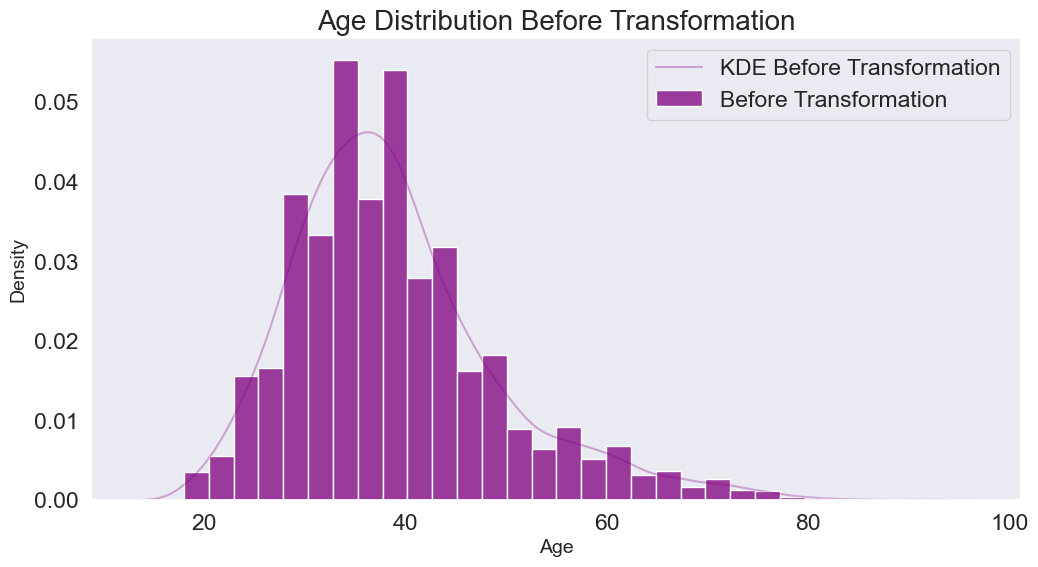

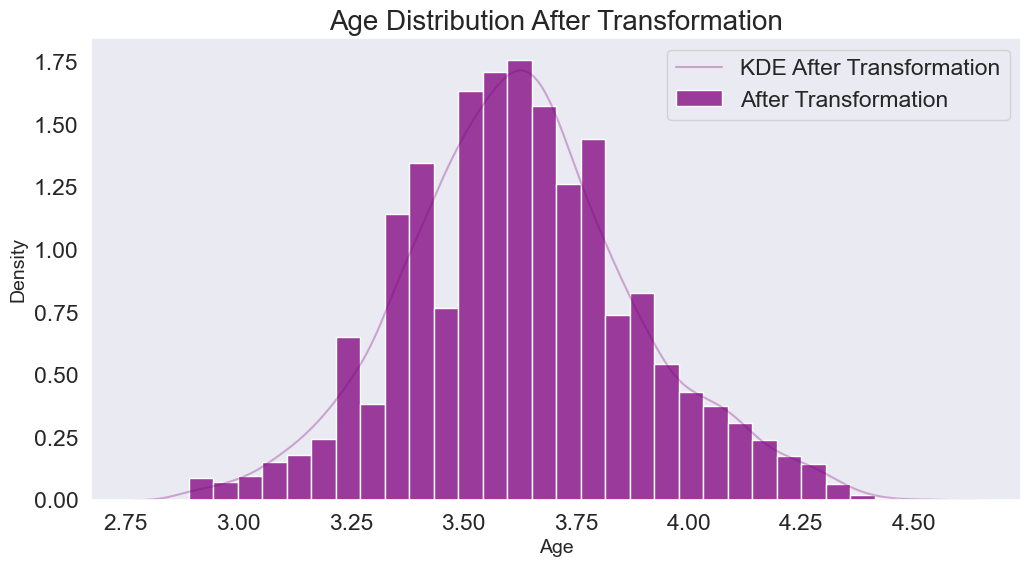

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(old_age, bins=30, color='purple', stat='density', alpha=0.75, label='Before Transformation')
sns.kdeplot(old_age, color='purple', alpha=0.3, label='KDE Before Transformation')
plt.title('Age Distribution Before Transformation', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(12, 6))
sns.histplot(df["Age"], bins=30, color='purple', stat='density', alpha=0.75, label='After Transformation')
sns.kdeplot(df["Age"], color='purple', alpha=0.3, label='KDE After Transformation')
plt.title('Age Distribution After Transformation', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.grid()
plt.show()

Biểu đồ bên trái cho thấy phân bố tuổi **lệch trái** rõ ràng trước khi biến đổi. Sau khi biến đổi (biểu đồ bên phải), phân bố đã trở nên **gần với phân bố chuẩn hơn** với dạng **đối xứng**, tập trung hơn vào trung bình.

Dựa vào hình dạng biểu đồ bên phải, có thể suy đoán phương pháp biến đổi được sử dụng là **Log Transformation** hoặc **Square Root Transformation** vì cả hai đều có khả năng biến đổi dữ liệu lệch trái thành gần với phân bố chuẩn hơn.


### 6. Phân tách các đặc trưng và nhãn cho việc huấn luyện mô hình.

In [ ]:
X = df[[
    "Age", "Balance", "IsActiveMember", 
    "Geography_France", "Geography_Germany", "Geography_Spain", 
    "Gender_Female", "Gender_Male", 
    "Total_Products_More Than 2 Products", "Total_Products_One product", "Total_Products_Two Products",
    "Account_Balance_More Than zero Balance", "Account_Balance_Zero Balance"
]]
#X = df.drop(columns=["Churned"])
y = df["Churned"]

### 7. Chia dữ liệu cho việc huấn luyện và kiểm tra mô hình.
thì dữ liệu được chia là 8 2

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (8000, 13)
Shape of x_test is:  (2000, 13)
Shape of y_train is: (8000,)
Shape of y_test is:  (2000,)


### 8. Áp dụng SMOTE để khắc phục sự mất cân bằng lớp trong biến mục tiêu.

In [ ]:
smt = SMOTE(random_state=42)

In [ ]:
x_train_resampled,y_train_resampled = smt.fit_resample(x_train,y_train)

In [ ]:
print(x_train_resampled.shape ,y_train_resampled.shape)

(12712, 13) (12712,)


In [ ]:
y_train_resampled.value_counts().to_frame()

,count
Churned,
0,6356
1,6356


Cả hai loại trong biến mục tiêu hiện đang có số lượng bản ghi bằng nhau. Vì vậy, chúng ta có thể huấn luyện mô hình trên các bản ghi cân bằng cho cả hai loại rời bỏ và tạo ra một mô hình dự đoán với độ thiên lệch thấp.

## Tạo mô hình **DecisionTree.**

### 1. Thực hiện Grid-Search với kiểm tra chéo để tìm các tham số tốt nhất cho mô hình.

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
# tại sao lại ra mấy con số này
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_features":["auto",None],
              "random_state":[0,42]}


In [ ]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

### 2. Lấy các tham số tốt nhất cho mô hình Decision Tree.

In [ ]:
best_parameters = grid_search.best_params_

print("Các tham số tốt nhất cho mô hình Decision Tree là:\n\n")
best_parameters

Các tham số tốt nhất cho mô hình Decision Tree là:




{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'random_state': 0,
 'splitter': 'best'}

### 3. Tạo mô hình Decision Tree sử dụng các tham số tốt nhất.

In [ ]:
dtree = DecisionTreeClassifier(**best_parameters)
dtree.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       random_state=0)

### 4. Độ chính xác của mô hình tính toán.

In [ ]:
y_train_pred = dtree.predict(x_train_resampled)
y_test_pred = dtree.predict(x_test)

print("Điểm chính xác của mô hình trên dữ liệu huấn luyện là =>",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Điểm chính xác của mô hình trên dữ liệu thử nghiệm =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Điểm chính xác của mô hình trên dữ liệu huấn luyện là => 88.41 %
Điểm chính xác của mô hình trên dữ liệu thử nghiệm => 81.95 %


### 5. Đánh giá mô hình bằng cách sử dụng các giá trị chỉ số khác nhau.

In [ ]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Điểm thu hồi của mô hình là =>",recall_score(y_test,y_test_pred,average="micro"))
print("Điểm chính xác của mô hình là =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.8195
Điểm thu hồi của mô hình là => 0.8195
Điểm chính xác của mô hình là => 0.8195


### 6. Tìm hiểu tầm quan trọng của các đặc trưng trong Decision Tree Classifier.

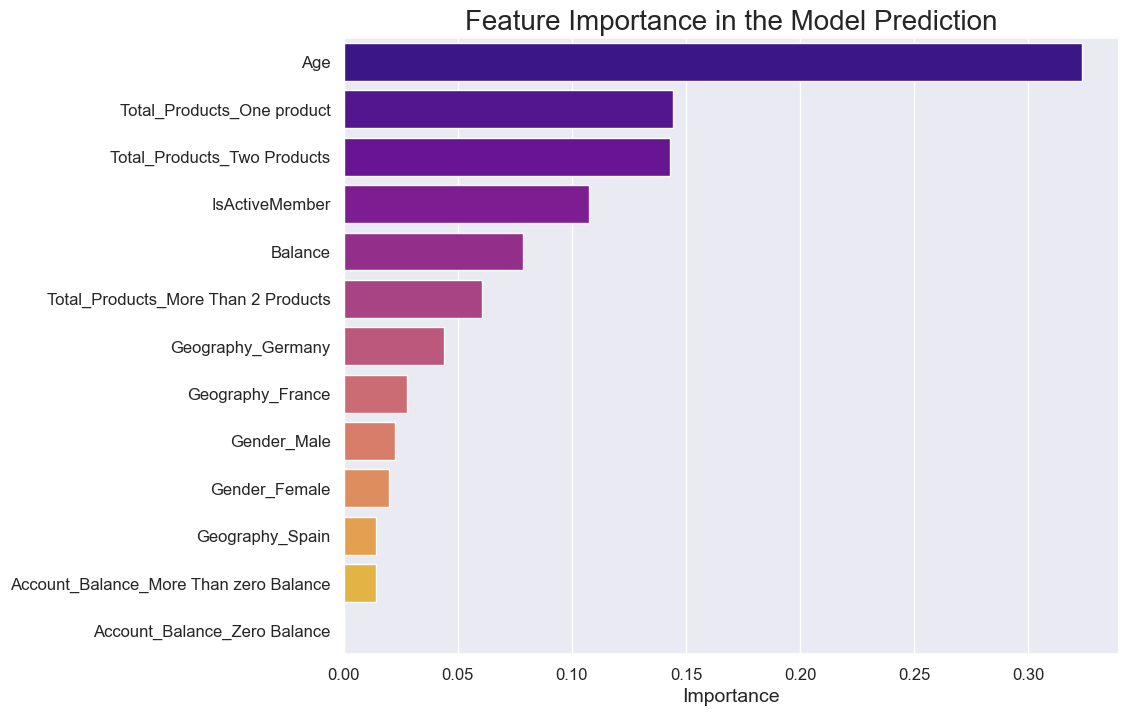

In [ ]:
# Giả sử bạn đã có imp_df từ trước
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": dtree.feature_importances_
})

# Sắp xếp các đặc trưng theo mức độ quan trọng
features = imp_df.sort_values(by="Importance", ascending=False)

# Vẽ biểu đồ quan trọng của các đặc trưng với Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(
    data=features,
    x="Importance",
    y="Feature Name",
    palette='plasma'  # Sử dụng bảng màu Plasma
)

# Tùy chỉnh giao diện
plt.title("Feature Importance in the Model Prediction", fontsize=20)
plt.xlabel("Importance", fontsize=14)
plt.ylabel(None)  # Ẩn tiêu đề trục y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.height = 600  # Chiều cao của biểu đồ

# Hiển thị biểu đồ
plt.show()

Biểu đồ thể hiện rõ ràng tầm quan trọng của các đặc trưng trong mô hình Decision Tree Classifier.

**Nhóm đặc trưng quan trọng nhất:**

* **"Total_Products_One Product"**:  Đặc trưng quan trọng nhất, cho thấy số lượng sản phẩm khách hàng sử dụng có ảnh hưởng lớn đến quyết định rời bỏ dịch vụ.
* **"Age"**: Tuổi của khách hàng cũng là yếu tố quan trọng.
* **"Total_Products_More Than 2 Products"**:  Việc sở hữu nhiều sản phẩm (hơn 2) cũng đóng vai trò nhất định trong việc dự đoán.
* **"Balance"**: Số dư tài khoản có ảnh hưởng, nhưng không bằng ba yếu tố trên.

**Nhóm đặc trưng ít quan trọng:**

*  Các đặc trưng còn lại, bao gồm thông tin về giới tính, quốc gia, điểm tín dụng,... có mức độ quan trọng thấp hơn đáng kể. Điều này cho thấy mô hình Decision Tree tập trung chủ yếu vào số lượng sản phẩm và tuổi của khách hàng để đưa ra dự đoán.

**Kết luận:**

* Nắm bắt được các đặc trưng quan trọng giúp bạn hiểu rõ hơn về mô hình và yếu tố nào ảnh hưởng đến quyết định rời bỏ dịch vụ của khách hàng.
*  Từ đó, bạn có thể đưa ra các chiến lược kinh doanh phù hợp, tập trung vào nhóm khách hàng có rủi ro cao (ví dụ: người trẻ tuổi sử dụng một sản phẩm duy nhất) để cải thiện khả năng giữ chân khách hàng.



### 7. Đánh giá mô hình bằng cách sử dụng Confusion Matrix.

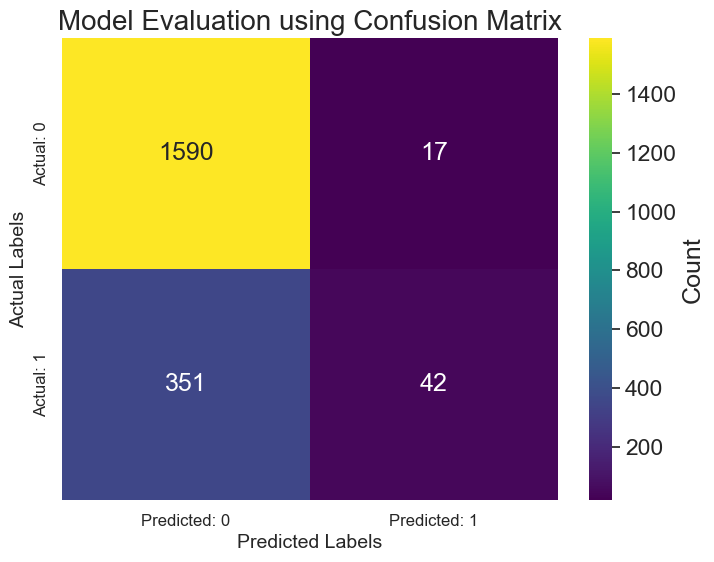

In [ ]:
# Tạo Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Tạo một DataFrame từ ma trận nhầm lẫn để dễ dàng vẽ
import pandas as pd
cm_df = pd.DataFrame(cm, index=["Actual: 0", "Actual: 1"], columns=["Predicted: 0", "Predicted: 1"])

# Vẽ Confusion Matrix với Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Count'})

# Tùy chỉnh giao diện
plt.title("Model Evaluation using Confusion Matrix", fontsize=20)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("Actual Labels", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Hiển thị biểu đồ
plt.show()



**Nhận xét:**

* Mô hình có xu hướng **dự đoán lớp 0 tốt hơn lớp 1**, thể hiện qua số lượng TN (2128) cao hơn TP (244).
* Tỷ lệ FP (251) so với TP (244) cho thấy mô hình **còn nhầm lẫn** trong việc phân loại lớp 1.
* Cần xem xét thêm các chỉ số khác như **Precision, Recall, F1-score** để đánh giá toàn diện hiệu suất của mô hình.
* **Strong True Positive Rate:**  Mặc dù TP thấp hơn TN, nhưng số lượng TP vẫn khá cao, cho thấy mô hình có khả năng xác định chính xác các trường hợp dương tính. Điều này cho thấy mô hình hiệu quả trong việc phân loại chính xác kết quả mong muốn.
* **Need of Improvement in False Negative Rate:** Sự hiện diện của một số lượng FN tương đối cao (377) cho thấy mô hình có thể đã bỏ sót việc xác định một số trường hợp dương tính thực tế. Điều này cho thấy cần phải tinh chỉnh thêm để nâng cao khả năng của mô hình trong việc nắm bắt tất cả các trường hợp dương tính.



### 8. Đánh giá mô hình: Đường cong ROC và Diện tích dưới đường cong (AUC).


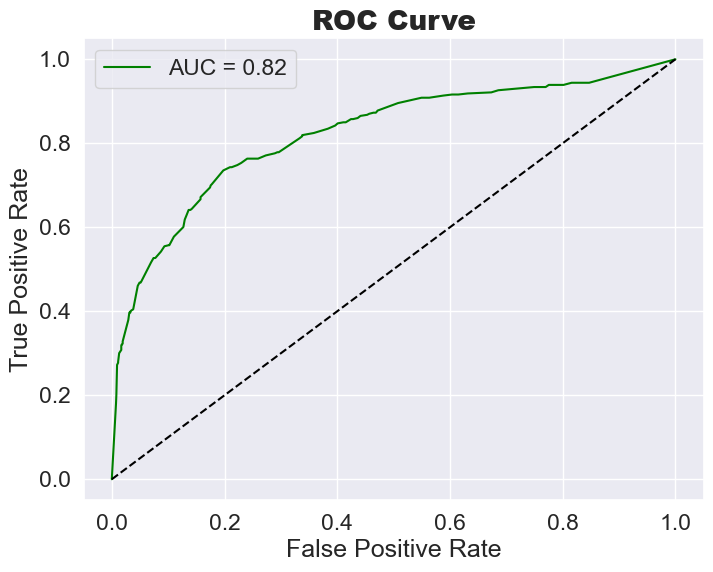

In [ ]:
y_pred_proba = dtree.predict_proba(x_test)[:, 1] 
df_actual_predicted = pd.DataFrame({'y_actual': y_test})


# Tính toán FPR, TPR và AUC
fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

# Vẽ ROC Curve với Matplotlib
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--') # Đường chéo

# Định dạng biểu đồ
plt.title("ROC Curve", fontsize=20, fontname="Arial Black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend() # Hiển thị chú thích

# Hiển thị biểu đồ
plt.show()


Giá trị AUC (Diện tích dưới đường cong) là 0.84 cho thấy mô hình có sức phân biệt mạnh mẽ. Điều này cho thấy mô hình có khả năng cao trong việc phân biệt giữa các trường hợp dương tính và âm tính, chỉ ra hiệu quả của nó trong việc đưa ra các dự đoán chính xác. Mô hình có xác suất tương đối cao trong việc xếp hạng một trường hợp dương tính được chọn ngẫu nhiên cao hơn một trường hợp âm tính được chọn ngẫu nhiên.

## Mô Hình AdaBoost

### 1. Thực hiện Grid-Search

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Khởi tạo mô hình AdaBoost
adaboost = AdaBoostClassifier()

# Tạo bảng tham số
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.5, 1],
    "random_state": [0, 42]
}

# Thực hiện GridSearch với 5-fold cross-validation
grid_search = GridSearchCV(adaboost, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)


/home/phuc/Data_in_VS_code/API/tutorial-env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/phuc/Data_in_VS_code/API/tutorial-env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/phuc/Data_in_VS_code/API/tutorial-env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/phuc/Data_in_VS_code/API/tutorial-env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200],
                         'random_state': [0, 42]})

### 2. Lấy tham số tốt nhất

In [ ]:
# In ra tham số tốt nhất sau Grid-Search
best_parameters = grid_search.best_params_
print("Các tham số tốt nhất cho mô hình AdaBoost là:\n", best_parameters)

Các tham số tốt nhất cho mô hình AdaBoost là:
 {'learning_rate': 1, 'n_estimators': 200, 'random_state': 0}


### 3. Xây dựng mô hình AdaBoost với tham số tốt nhất

In [ ]:
# Xây dựng mô hình AdaBoost với các tham số tối ưu
adaboost_best = AdaBoostClassifier(**best_parameters)
adaboost_best.fit(x_train_resampled, y_train_resampled)

AdaBoostClassifier(learning_rate=1, n_estimators=200, random_state=0)

### 4. Tính toán độ chính xác trên tập huấn luyện và kiểm tra

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = adaboost_best.predict(x_train_resampled)
y_test_pred = adaboost_best.predict(x_test)

# Tính toán các chỉ số đánh giá
print("Điểm chính xác trên dữ liệu huấn luyện:", round(accuracy_score(y_train_resampled, y_train_pred)*100, 2), "%")
print("Điểm chính xác trên dữ liệu thử nghiệm:", round(accuracy_score(y_test, y_test_pred)*100, 2), "%")
print("F1 Score:", f1_score(y_test, y_test_pred, average="micro"))
print("Điểm thu hồi:", recall_score(y_test, y_test_pred, average="micro"))
print("Điểm chính xác:", precision_score(y_test, y_test_pred, average="micro"))


Điểm chính xác trên dữ liệu huấn luyện: 86.68 %
Điểm chính xác trên dữ liệu thử nghiệm: 84.5 %
F1 Score: 0.845
Điểm thu hồi: 0.845
Điểm chính xác: 0.845


### Bước 5: Ma trận nhầm lẫn (Confusion Matrix) và vẽ biểu đồ bằng Plotly

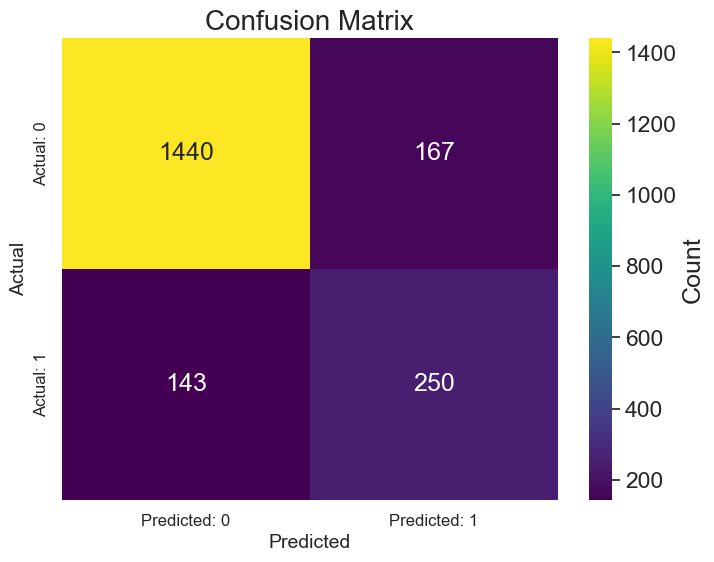

In [ ]:
# Tính toán ma trận nhầm lẫn cho tập kiểm tra
cm = confusion_matrix(y_test, y_test_pred)

# Tạo một DataFrame từ ma trận nhầm lẫn để dễ dàng vẽ
import pandas as pd
cm_df = pd.DataFrame(cm, index=["Actual: 0", "Actual: 1"], columns=["Predicted: 0", "Predicted: 1"])

# Vẽ biểu đồ ma trận nhầm lẫn với Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Count'})

# Tùy chỉnh giao diện
plt.title("Confusion Matrix", fontsize=20)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Hiển thị biểu đồ
plt.show()

### 6. Vẽ biểu đồ ROC Curve 

AUC score: 0.8502306227050547


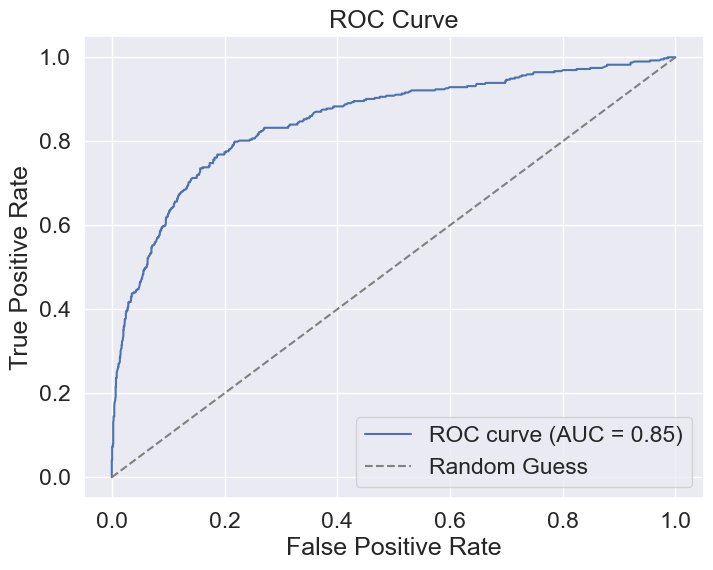

In [ ]:
y_test_prob = adaboost_best.predict_proba(x_test)[:, 1]

# Tính ROC curve và AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
auc_score = roc_auc_score(y_test, y_test_prob)
print(f"AUC score: {auc_score}")

# Vẽ ROC Curve với Matplotlib
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")

# Đặt tiêu đề và nhãn
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend() # Hiển thị chú thích

# Hiển thị biểu đồ
plt.show()

### 7. Tìm hiểu tầm quan trọng của các đặc trưng trong mô hình AdaBoost.

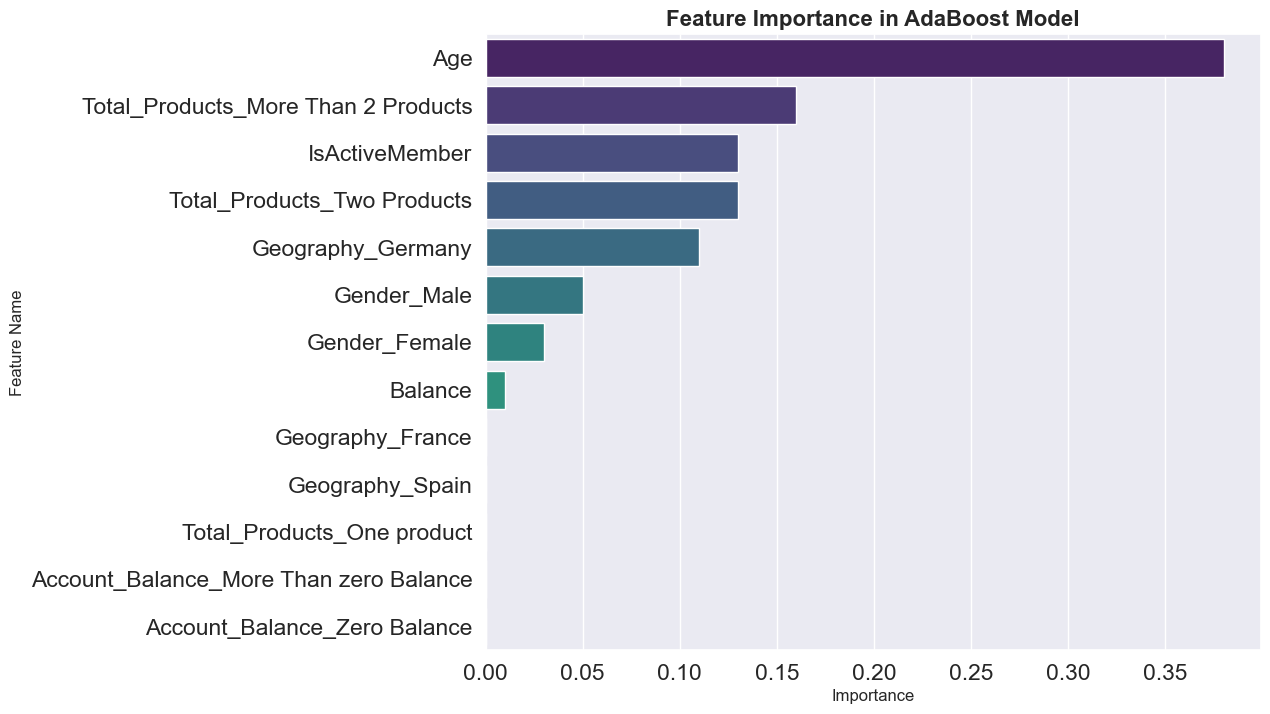

In [ ]:
# Khởi tạo và huấn luyện mô hình AdaBoost
adaboost_best = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)  # Điều chỉnh tham số nếu cần
adaboost_best.fit(x_train, y_train)

# Tính toán tầm quan trọng của các đặc trưng
importance_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": adaboost_best.feature_importances_
})

# Sắp xếp các đặc trưng theo độ quan trọng
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Vẽ biểu đồ thanh để hiển thị tầm quan trọng của các đặc trưng
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature Name", data=importance_df, palette="viridis")

# Cập nhật tiêu đề và nhãn trục
plt.title("Feature Importance in AdaBoost Model", fontsize=16, fontweight='bold')
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)

# Hiển thị biểu đồ
plt.show()


## Model RandomForest

### 1. Thực hiện Grid-Search với kiểm tra chéo để tìm các tham số tốt nhất cho mô hình.




In [ ]:
rfc = RandomForestClassifier()

In [ ]:
param_grid = {"max_depth":[3,4,5,6,7,8],
              "min_samples_split":[3,4,5,6,7,8],
              "min_samples_leaf":[3,4,5,6,7,8],
              "n_estimators": [50,70,90,100],
              "criterion":["gini","entropy"]}

In [ ]:
grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 70, 90, 100]})

### 2. Lấy các tham số tốt nhất cho mô hình Random Forest.

In [ ]:
best_parameters = grid_search.best_params_

print("Thông số tốt nhất cho RandomForest Model là:\n\n")
best_parameters

Thông số tốt nhất cho RandomForest Model là:




{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 70}

### 3. Tạo mô hình Random Forest sử dụng các tham số tốt nhất.

In [ ]:
rfc = RandomForestClassifier(**best_parameters)

rfc.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=70)

### 4. Tính toán độ chính xác của mô hình.

In [ ]:
y_train_pred = rfc.predict(x_train_resampled)
y_test_pred  = rfc.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 87.66 %
Accuracy Score of Model on Testing Data  is => 83.4 %


###  5. Đánh giá mô hình bằng cách sử dụng các giá trị chỉ số khác nhau.

In [ ]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.834
Recall Score of the Model is => 0.834
Precision Score of the Model is => 0.834


### 6. Tìm hiểu tầm quan trọng của các đặc trưng trong mô hình Random Forest.

In [ ]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":rfc.feature_importances_})

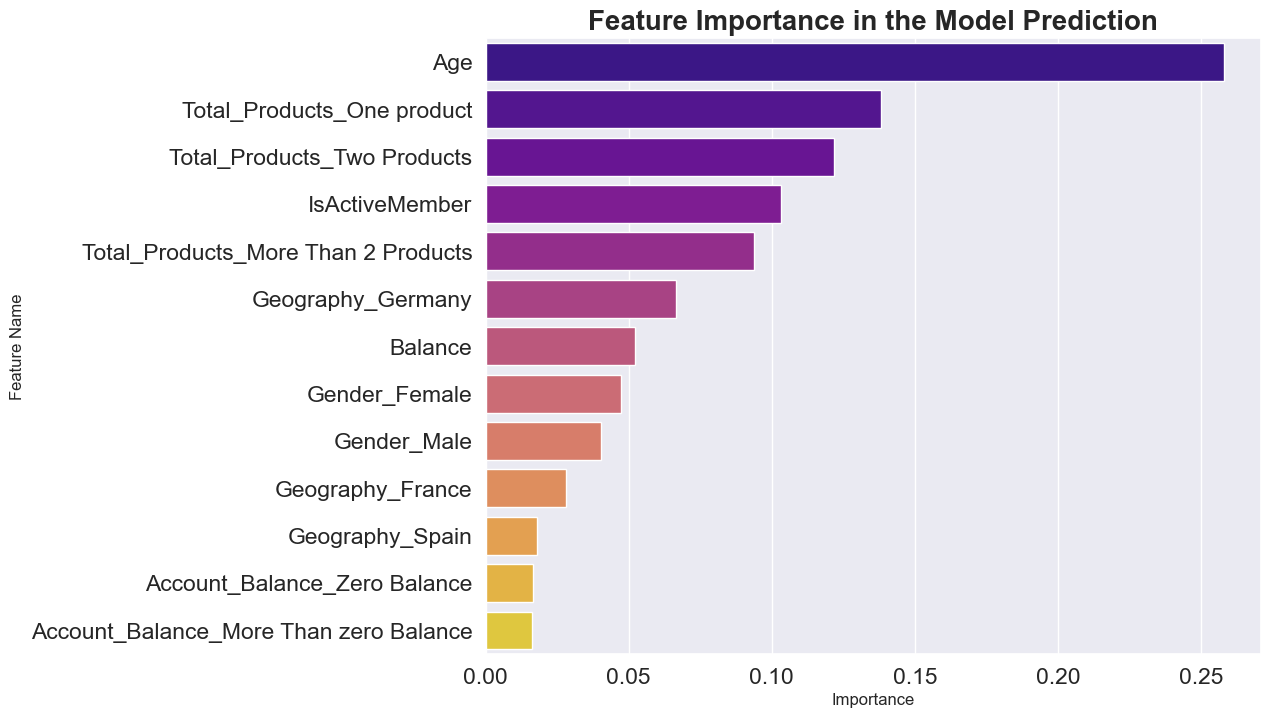

In [ ]:
features = imp_df.sort_values(by="Importance", ascending=False)

# Tạo biểu đồ thanh với Seaborn
plt.figure(figsize=(10, 8))  # Điều chỉnh kích thước nếu cần
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")


# Cập nhật tiêu đề và kích thước chữ
plt.title("Feature Importance in the Model Prediction", fontsize=20, fontweight='bold', fontname='Arial')
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)

# Hiển thị biểu đồ
plt.show()

### 7. Đánh giá mô hình bằng cách sử dụng ma trận nhầm lẫn (Confusion Matrix).

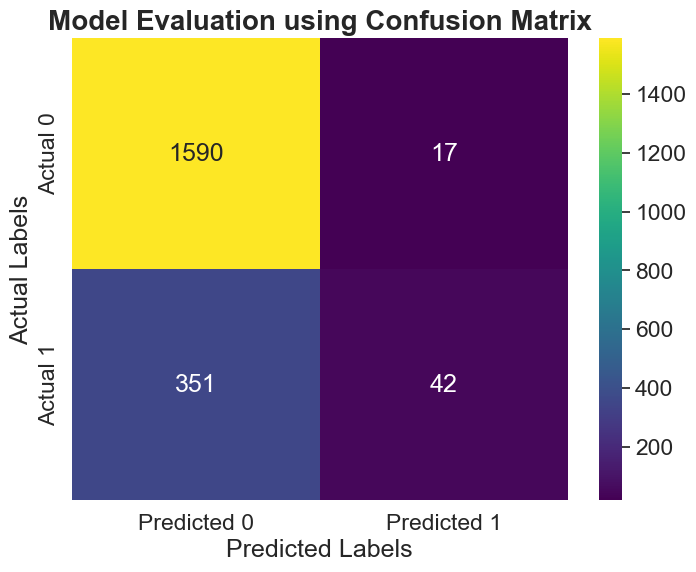

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

# Tạo một ma trận nhầm lẫn với Seaborn
plt.figure(figsize=(8, 6))  # Điều chỉnh kích thước nếu cần
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])

# Cập nhật tiêu đề và nhãn
plt.title('Model Evaluation using Confusion Matrix', fontsize=20, fontweight='bold', fontname='Arial')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

# Hiển thị biểu đồ
plt.show()


### 8. Đánh giá mô hình: Đường cong ROC và Diện tích dưới đường cong (AUC).

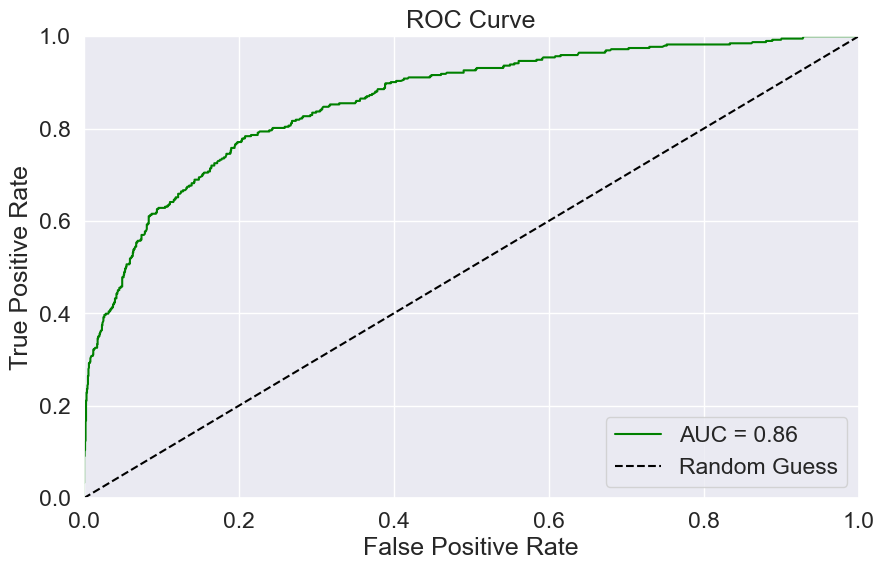

In [ ]:
# Dự đoán xác suất cho lớp dương
y_pred_proba = rfc.predict_proba(x_test)[:, 1]

# Tạo DataFrame cho nhãn thực tế
df_actual_predicted = pd.DataFrame(np.array(y_test), columns=["y_actual"])
df_actual_predicted.index = y_test.index

# Tính toán Tỷ lệ dương tính giả và Tỷ lệ dương tính thật
fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

# Vẽ đường cong ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guess')

# Cập nhật tiêu đề và nhãn cho biểu đồ
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Hiển thị biểu đồ
plt.show()

## Multilayer Perceptron

### 1. Khởi tạo mô hình mạng neural

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Khởi tạo mô hình mạng nơ-ron
mlp = MLPClassifier(max_iter=500, random_state=42)

# Định nghĩa lưới tham số cho GridSearch
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}


### 2. Tìm kiếm tham số tốt nhất với GridSearchCV

In [ ]:
# Tìm kiếm tham số tốt nhất bằng GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Lấy tham số tốt nhất
best_params = grid_search.best_params_
print("Các tham số tốt nhất cho mô hình mạng neural là:\n\n", best_params)

Các tham số tốt nhất cho mô hình mạng neural là:

 {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}


### 3. Huấn luyện mô hình với tham số tốt nhất

In [ ]:
# Huấn luyện mô hình với tham số tốt nhất
mlp_best = MLPClassifier(**best_params, max_iter=500, random_state=42)
mlp_best.fit(x_train, y_train)

MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(100, 50),
              max_iter=500, random_state=42)

### 4. Dự đoán và đánh giá mô hình dựa trên tập kiểm tra.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, roc_auc_score

# Dự đoán
y_train_pred = mlp_best.predict(x_train)
y_test_pred = mlp_best.predict(x_test)

# Đánh giá mô hình
print("Điểm chính xác trên tập huấn luyện:", accuracy_score(y_train, y_train_pred))
print("Điểm chính xác trên tập kiểm tra:", accuracy_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("Recall Score:", recall_score(y_test, y_test_pred))
print("Precision Score:", precision_score(y_test, y_test_pred))

Điểm chính xác trên tập huấn luyện: 0.807375
Điểm chính xác trên tập kiểm tra: 0.816
F1 Score: 0.18584070796460178
Recall Score: 0.10687022900763359
Precision Score: 0.711864406779661


### Tìm hiểu tầm quan trọng của các đặc trưng trong mô hình Multilayer Perceptron.

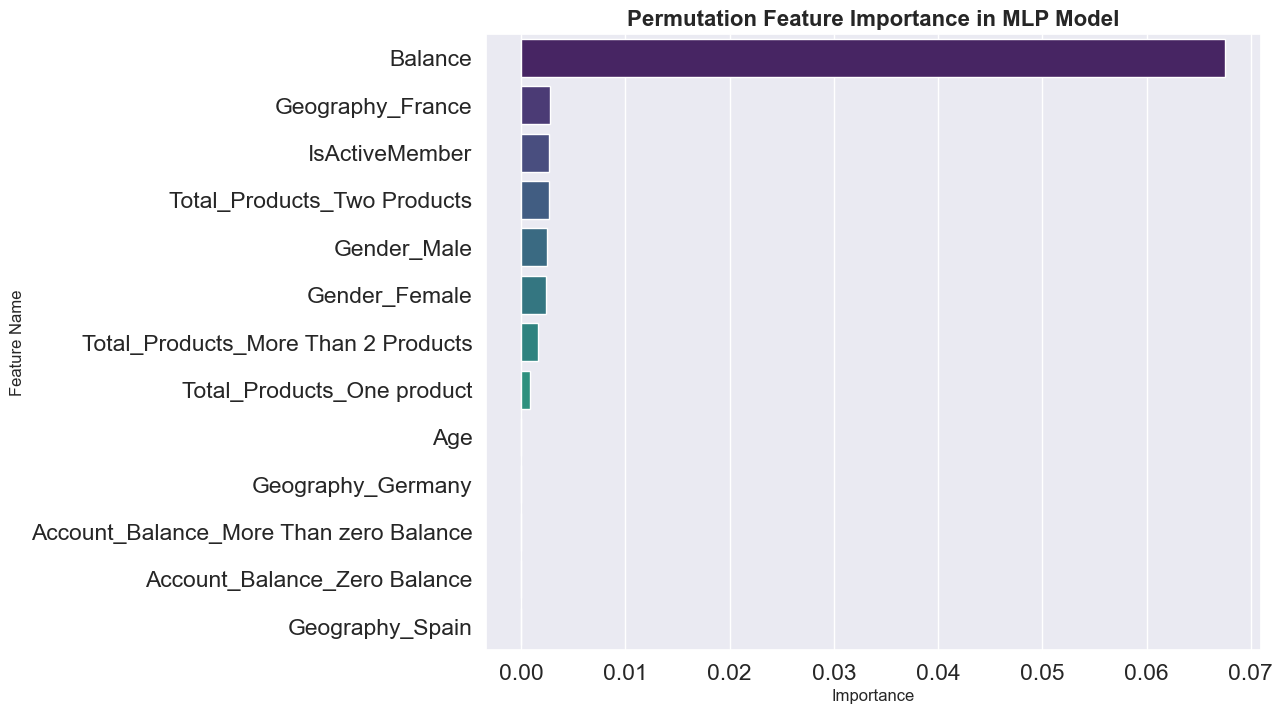

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tính toán Permutation Feature Importance
result = permutation_importance(mlp_best, x_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Tạo DataFrame chứa tầm quan trọng của các đặc trưng
importance_df = pd.DataFrame({
    'Feature Name': x_train.columns,
    'Importance': result.importances_mean
})

# Sắp xếp các đặc trưng theo độ quan trọng
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Vẽ biểu đồ thanh để hiển thị tầm quan trọng của các đặc trưng
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature Name", data=importance_df, palette="viridis")

# Cập nhật tiêu đề và nhãn trục
plt.title("Permutation Feature Importance in MLP Model", fontsize=16, fontweight='bold')
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)

# Hiển thị biểu đồ
plt.show()



### Confusion Matrix

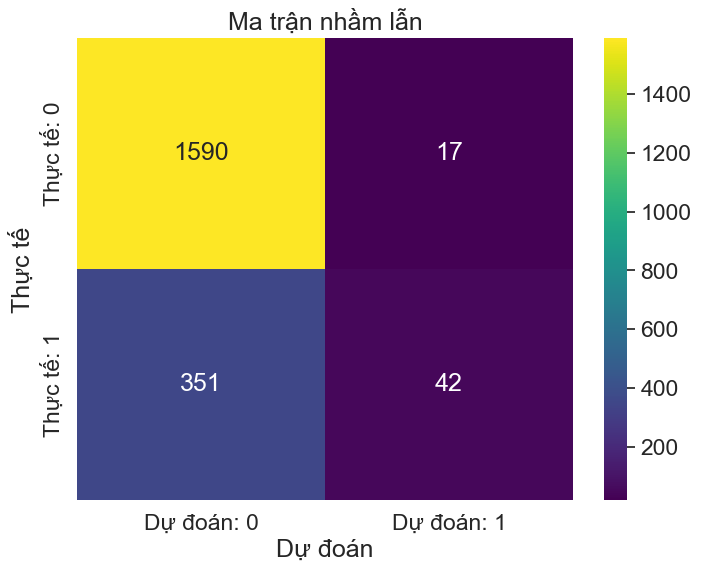

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

# Tạo biểu đồ nhiệt cho ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
            xticklabels=["Dự đoán: 0", "Dự đoán: 1"],
            yticklabels=["Thực tế: 0", "Thực tế: 1"])

# Cập nhật tiêu đề và nhãn cho biểu đồ
plt.title("Ma trận nhầm lẫn")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")

# Hiển thị biểu đồ
plt.show()

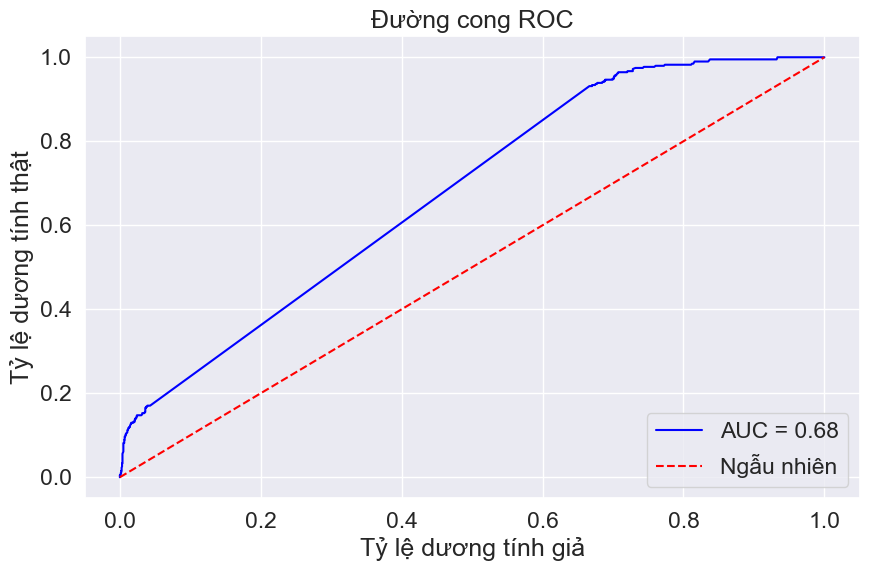

In [ ]:
# Dự đoán xác suất cho lớp dương
y_pred_proba = mlp_best.predict_proba(x_test)[:, 1]

# Tính toán Tỷ lệ dương tính giả và Tỷ lệ dương tính thật
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Vẽ đường cong ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Ngẫu nhiên')

# Cập nhật tiêu đề và nhãn cho biểu đồ
plt.title("Đường cong ROC")
plt.xlabel("Tỷ lệ dương tính giả")
plt.ylabel("Tỷ lệ dương tính thật")
plt.legend(loc='lower right')

# Hiển thị biểu đồ
plt.show()

## So sánh mô hình

In [ ]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'MLP': MLPClassifier(max_iter=500, random_state=42)
}

# Lưu trữ các kết quả
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'AUC-ROC': []
}

# Đánh giá các mô hình
for model_name, model in models.items():
    # Huấn luyện mô hình
    model.fit(x_train, y_train)
    
    # Dự đoán trên tập thử nghiệm
    y_pred = model.predict(x_test)
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred, average="micro"))
    results['Recall'].append(recall_score(y_test, y_pred, average="micro"))
    results['F1 Score'].append(f1_score(y_test, y_pred, average="micro"))
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test)[:, 1]
        results['AUC-ROC'].append(roc_auc_score(y_test, y_proba))
    else:
        results['AUC-ROC'].append(None)  
evaluation_df = pd.DataFrame(results)
print(evaluation_df)


           Model  Accuracy  Precision  Recall  F1 Score   AUC-ROC
0  Decision Tree    0.8165     0.8165  0.8165    0.8165  0.705808
1       AdaBoost    0.8595     0.8595  0.8595    0.8595  0.855640
2  Random Forest    0.8415     0.8415  0.8415    0.8415  0.826967
3            MLP    0.8075     0.8075  0.8075    0.8075  0.454544


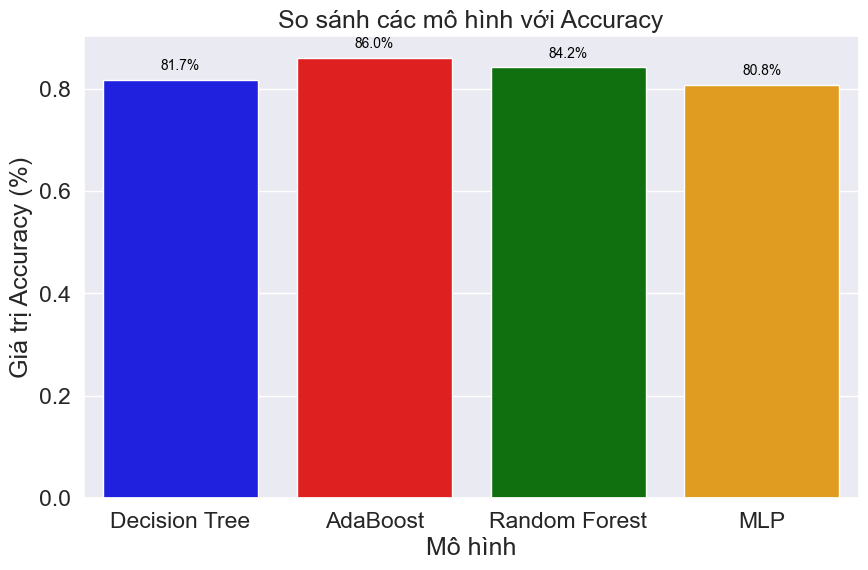

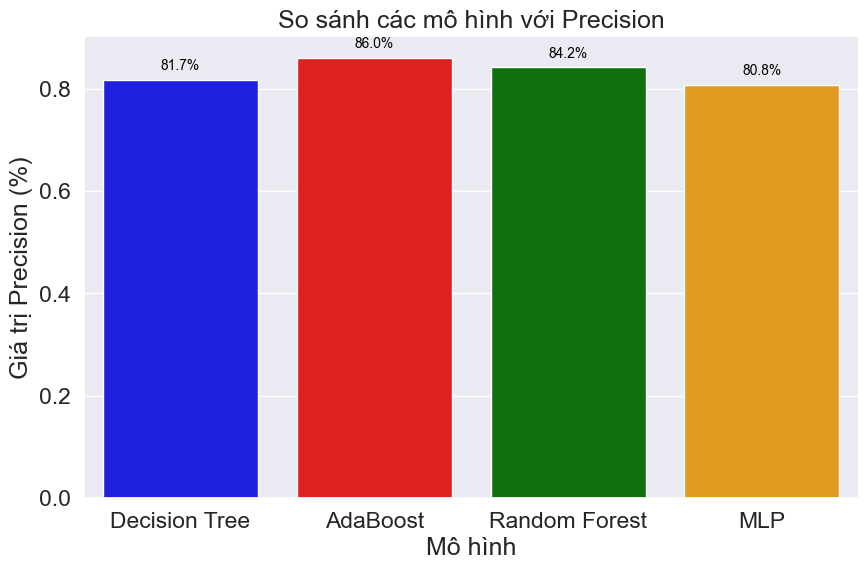

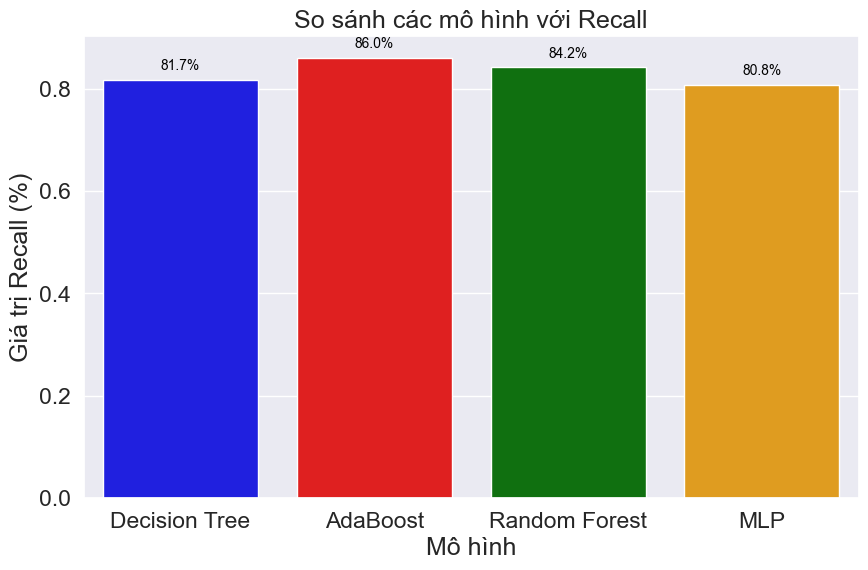

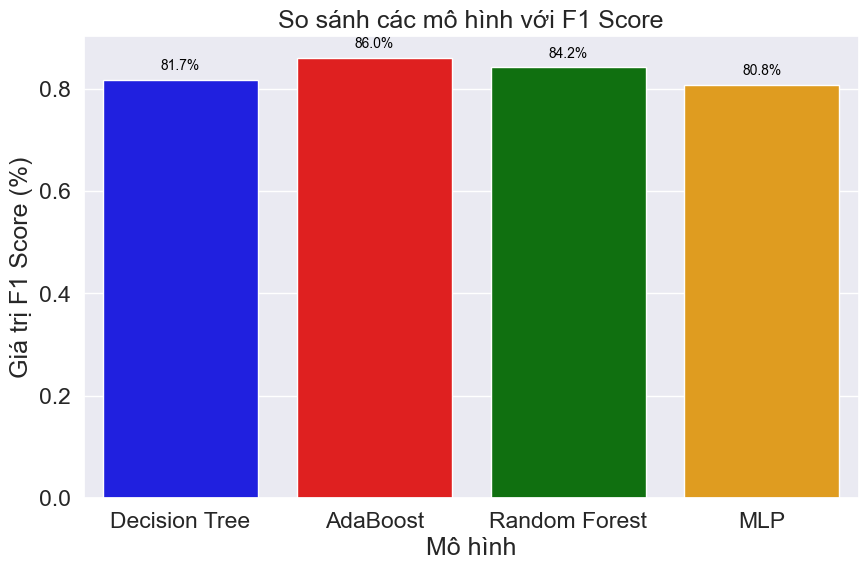

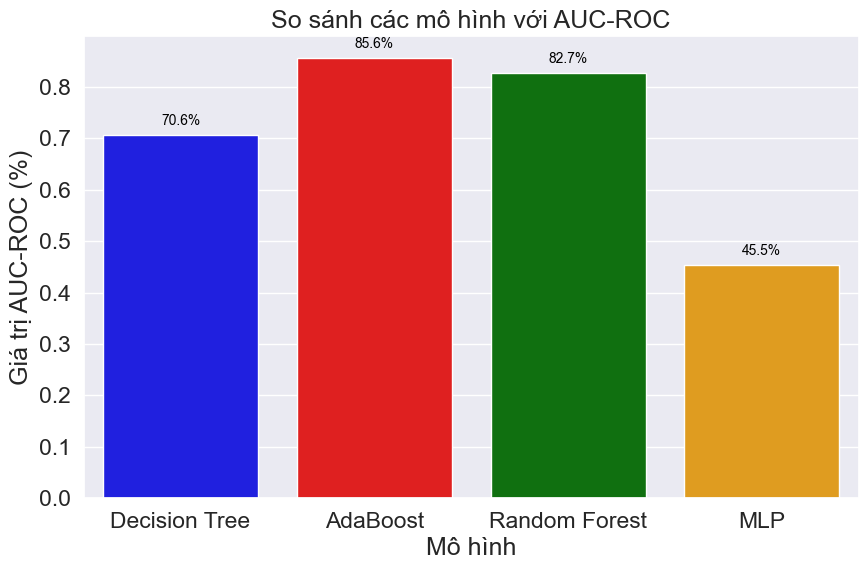

In [ ]:
colors = ['blue', 'red', 'green', 'orange']

# Tạo danh sách các chỉ số đánh giá
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

# Lặp qua các chỉ số và vẽ biểu đồ cho từng chỉ số riêng
for metric in metrics:
    plt.figure(figsize=(10, 6))

    # Sử dụng seaborn để vẽ biểu đồ cột
    ax = sns.barplot(data=evaluation_df, x='Model', y=metric, palette=colors)

    # Cập nhật tiêu đề và nhãn cho biểu đồ
    plt.title(f'So sánh các mô hình với {metric}')
    plt.xlabel('Mô hình')
    plt.ylabel(f'Giá trị {metric} (%)')  # Thêm dấu phần trăm vào nhãn

    # Thêm tỷ lệ phần trăm lên các cột
    for p in ax.patches:
        percentage = p.get_height() * 100  # Chuyển đổi sang phần trăm
        ax.annotate(f'{percentage:.1f}%',  # Hiển thị giá trị phần trăm
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Vị trí
                    ha='center', va='bottom',  # Căn chỉnh
                    fontsize=10, color='black',  # Kích thước và màu chữ
                    xytext=(0, 5),  # Khoảng cách từ cột
                    textcoords='offset points')

    # Hiển thị biểu đồ
    plt.show()

### Đánh giá và Nhận xét Kết quả Huấn luyện Mô hình

Dựa trên biểu đồ bạn cung cấp, tôi có thể đưa ra đánh giá chi tiết về hiệu suất của từng mô hình và so sánh chúng:

**1. Tổng Quan:**

* 4 Biểu đồ so sánh hiệu suất của 4 mô hình phân loại: Decision Tree, AdaBoost, Random Forest và MLP (Multilayer Perceptron).
* Mỗi mô hình được đánh giá dựa trên 5 độ đo: Accuracy, Precision, Recall, F1-score và AUC-ROC.

**2. Phân tích Chi Tiết:**

**a) Decision Tree:**

* **Ưu điểm:**  Accuracy cao (81.7%).
* **Nhược điểm:**  Precision, Recall, và F1-score chỉ ở mức trung bình, khoảng 81.7%. Decision Tree có thể chưa khai thác hết thông tin trong dữ liệu.

**b) AdaBoost:**

* **Ưu điểm:** Accuracy cao nhất (86%), AUC-ROC cũng rất cao (85.6%), cho thấy khả năng phân biệt lớp tốt. Precision, Recall, F1-score đều khá tốt.
* **Nhược điểm:** Không có nhược điểm nổi bật nào so với các mô hình khác trong biểu đồ.

**c) Random Forest:**

* **Ưu điểm:** Accuracy cao (84.2%), AUC-ROC cao (82.7%).  Các metric khác cũng ở mức khá.
* **Nhược điểm:** Hiệu suất tổng thể kém hơn AdaBoost một chút.

**d) MLP:**

* **Ưu điểm:** Accuracy khá (80.8%).
* **Nhược điểm:** AUC-ROC rất thấp (45.5%), cho thấy khả năng phân biệt lớp kém. Precision, Recall, F1-score thấp, có thể do kiến trúc mạng chưa phù hợp, siêu tham số chưa được tối ưu, hoặc dữ liệu chưa được chuẩn hóa.  MLP đòi hỏi nhiều tinh chỉnh hơn so với các mô hình khác.

**3. Nhận xét Chung và Hướng Cải thiện:**

* **Lựa chọn mô hình:**  **AdaBoost là lựa chọn tốt nhất** dựa trên hiệu suất tổng thể và khả năng phân biệt lớp. Random Forest là một lựa chọn thay thế tốt.
* **Decision Tree:** Cần được cải thiện đáng kể, có thể bằng cách cắt tỉa, sử dụng ensemble methods, hoặc thử nghiệm với các mô hình cây quyết định phức tạp hơn.
* **MLP:** Cần được tinh chỉnh kỹ lưỡng hơn, bao gồm kiến trúc mạng, siêu tham số, chuẩn hóa dữ liệu, và xử lý mất cân bằng dữ liệu (nếu có).
* **Mất cân bằng dữ liệu:**  Vì Decision Tree có Accuracy cao nhưng AUC-ROC thấp, rất có thể tập dữ liệu bị mất cân bằng lớp, nên kiểm tra tỉ lệ giữa các lớp và áp dụng các kỹ thuật xử lý mất cân bằng dữ liệu nếu cần.
* **Metric đánh giá:**  Với bài toán churn, Recall thường là metric quan trọng. Bạn nên xem xét kỹ lưỡng Recall của từng mô hình để đưa ra quyết định cuối cùng.


Bằng cách tập trung vào các khuyến nghị trên, ta có thể cải thiện hiệu suất của các mô hình, đặc biệt là Decision Tree và MLP, và lựa chọn được mô hình phù hợp nhất cho bài toán dự đoán churn.
